In [21]:
import numpy as np
from data_180218 import load_data
from spot2intensity import Spots
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import copy
from utils import ensure_dir
import statsmodels.api as sm
from scipy.interpolate import interp1d
from correlation_significance import correlated_significance
import matplotlib.cm as cm



In [2]:
collections = load_data()

In [3]:
cs_vir1_names = ["slide_21","slide_22","slide_23","slide_24","slide_25"]
cs_vir2_names = ["slide_26","slide_27","slide_28","slide_29","slide_30"]
cs_vir3_names = ["slide_31","slide_32","slide_33","slide_34","slide_35"]
cs_vir4_names = ["slide_36","slide_37","slide_39","slide_40"]
cs_vir5_names = ["slide_41","slide_42","slide_44","slide_45"]

cs_vir1={collections[c]:"HongKong/4801/2014" for c in cs_vir1_names}
cs_vir2={collections[c]:"Brisbaine/59/2007" for c in cs_vir2_names}
cs_vir3={collections[c]:"Cal" for c in cs_vir3_names}
cs_vir4={collections[c]:"Brisbaine/10/2007" for c in cs_vir4_names}
cs_vir5={collections[c]:"X31" for c in cs_vir5_names}

collections_dict = {}
frames = []

for d in [cs_vir1,cs_vir2,cs_vir3,cs_vir4,cs_vir5]:
    for k, v in d.iteritems():
        collections_dict[k] = v
viruses = set(collections_dict.values())
virus_combinations = list(combinations(viruses,2))



In [4]:


frames = []
for c, virus in collections_dict.iteritems():
    spots_c = Spots.load_pickel(c)
    #mean_blank = spots_c.df[spots_c.df["Name"]=="blank"]["intensities2"].median()
    #spots_c.df["intensities2"] = spots_c.df["intensities2"] - mean_blank
    spots_c.select_by_circlequal(0.4)
    spots_c.add_virus(virus)
    spots_c.add_c_name(c.name)
    frames.append(spots_c.df)
spots = pd.concat(frames)







In [7]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj).outlier_filtering()frames = []
c1 = spots[spots["Collection"] == "slide_21"]
c1n = c1.set_index(["Name"])

for name, data in spots.groupby("Collection"):
    print(name)
    #norm_to_slide_21
    if name != "slide_21":
        c2n = data.set_index(["Name"])
        x1= np.log10(c1n["intensities2"]*c2n["intensities2"])
        y1 = np.log2(c1n["intensities2"]/c2n["intensities2"])
        lowess = sm.nonparametric.lowess(y1, x1, frac=0.33)
        
        f = interp1d(lowess[:,0],lowess[:,1], bounds_error=False)
        framesp = []
        x_mean = x1.reset_index().groupby("Name").agg(["mean","std"])
        x_mean = x_mean.reset_index().rename(columns = { "intensities2":"x_norm" })
        data = pd.merge(data,x,  how='left', left_on='Name', right_on = 'Name')


        data["intensities2"] = data["intensities2"]*(2**(f( data["x_norm"])))
    
    frames.append(data)
    
norm_spots = pd.concat(frames)

slide_21
slide_22


/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[     Block  Row  Column          Name                            circles  \
ID                                                                         
755      1   51       5  AK Cal 28666  Circle(xy=(309, 3112), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
755       5299.252103  [[780, 921, 865, 744, 794, 872, 854, 718, 908,...   

     intensities2  intensities  intensities2_b  \
ID                                               
755   1794.996845     14913624      549.671924   

                                               squares  circle_qual  \
ID                                                                    
755  Rectangle(xy=(282.5, 3077.5), width=67, height...     0.359375   

                  Virus Collection  x_norm  
ID                                          
755  HongKong/4801/2014   slide_22     NaN  ,      Block  Row  Column          Name   

/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:658: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:659: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


[     Block  Row  Column          Name                            circles  \
ID                                                                         
105      1    7      15  AK Cal 28667   Circle(xy=(981, 547), radius=16)   
477      1   32      12  AK Cal 28667  Circle(xy=(783, 2023), radius=10)   
570      1   38      15  AK Cal 28667  Circle(xy=(991, 2373), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
105        911.471267  [[160, 101, 106, 155, 119, 105, 154, 245, 231,...   
477       1179.280008  [[830, 725, 888, 973, 1279, 1865, 18367, 4430,...   
570      29231.313604  [[1011, 1038, 992, 893, 871, 801, 774, 1081, 1...   

     intensities2  intensities  intensities2_b  \
ID                                               
105    392.709251     33614672      180.180617   
477    612.076336     88386584      195.851145   
570  36172.914826     98034713    219

[     Block  Row  Column          Name                            circles  \
ID                                                                         
755      1   51       5  AK Cal 28666  Circle(xy=(311, 3131), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
755       4903.060137  [[4513, 3904, 4087, 12932, 4479, 4132, 4847, 4...   

     intensities2  intensities  intensities2_b  \
ID                                               
755   6713.883281     34386086      256.069401   

                                               squares  circle_qual  \
ID                                                                    
755  Rectangle(xy=(268.5, 3100.5), width=67, height...          0.5   

                  Virus Collection  x_norm  
ID                                          
755  HongKong/4801/2014   slide_24     NaN  ,      Block  Row  Column          Name   

[     Block  Row  Column          Name                            circles  \
ID                                                                         
755      1   51       5  AK Cal 28666  Circle(xy=(308, 3112), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
755       2328.189291  [[161, 208, 320, 381, 278, 303, 191, 236, 390,...   

     intensities2  intensities  intensities2_b  \
ID                                               
755   6612.485804     12358253      359.246057   

                                               squares  circle_qual  \
ID                                                                    
755  Rectangle(xy=(280.5, 3085.5), width=67, height...     0.359375   

                  Virus Collection  x_norm  
ID                                          
755  HongKong/4801/2014   slide_25     NaN  ,      Block  Row  Column          Name   

[     Block  Row  Column          Name                            circles  \
ID                                                                         
383      1   26       8  AK Cal 28666  Circle(xy=(507, 1642), radius=10)   
662      1   45       2  AK Cal 28666  Circle(xy=(102, 2768), radius=14)   

     std_intensities2                                        spot_images  \
ID                                                                         
383      23758.620527  [[5283, 5347, 5308, 5158, 5213, 5404, 5192, 53...   
662       3865.877652  [[14153, 16258, 17735, 16062, 15505, 16205, 15...   

     intensities2  intensities  intensities2_b  \
ID                                               
383  29814.649842     31746248     1605.965300   
662  16669.978793     70442772      501.181077   

                                               squares  circle_qual  \
ID                                                                    
383  Rectangle(xy=(478.5, 1612.5), width=67, h

[     Block  Row  Column          Name                            circles  \
ID                                                                         
290      1   20       5  AK Cal 28666  Circle(xy=(324, 1270), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
290       2597.384399  [[318, 342, 407, 537, 6329, 5006, 4840, 2139, ...   

     intensities2  intensities  intensities2_b  \
ID                                               
290   2949.211356     13748808      181.305994   

                                               squares  circle_qual  \
ID                                                                    
290  Rectangle(xy=(277.5, 1247.5), width=67, height...     0.359375   

                 Virus Collection  x_norm  
ID                                         
290  Brisbaine/59/2007   slide_27     NaN  ,      Block  Row  Column          Name      

[     Block  Row  Column Name                            circles  \
ID                                                                
1        1    1       1   LF    Circle(xy=(39, 153), radius=16)   
2        1    1       2   LF   Circle(xy=(103, 149), radius=16)   
3        1    1       3   LF   Circle(xy=(176, 147), radius=16)   
4        1    1       4   LF   Circle(xy=(244, 150), radius=16)   
5        1    1       5   LF   Circle(xy=(310, 148), radius=16)   
6        1    1       6   LF   Circle(xy=(373, 149), radius=16)   
68       1    5       8   LF   Circle(xy=(516, 386), radius=10)   
92       1    7       2   LF   Circle(xy=(101, 510), radius=14)   
161      1   11      11   LF   Circle(xy=(715, 747), radius=10)   
172      1   12       7   LF   Circle(xy=(443, 804), radius=16)   
185      1   13       5   LF   Circle(xy=(307, 864), radius=14)   
233      1   16       8   LF  Circle(xy=(502, 1036), radius=10)   
254      1   17      14   LF  Circle(xy=(916, 1098), radius=1

[     Block  Row  Column          Name                            circles  \
ID                                                                         
569      1   38      14  AK Cal 28666  Circle(xy=(917, 2390), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
569       2426.026566  [[7182, 5134, 6921, 7488, 7113, 5118, 6105, 74...   

     intensities2  intensities  intensities2_b  \
ID                                               
569   6598.477099     26427465      203.679389   

                                               squares  circle_qual  \
ID                                                                    
569  Rectangle(xy=(879.5, 2337.5), width=67, height...      0.46875   

                 Virus Collection  x_norm  
ID                                         
569  Brisbaine/59/2007   slide_29     NaN  ,      Block  Row  Column       Name         

[     Block  Row  Column          Name                           circles  \
ID                                                                        
197      1   14       2  AK Cal 28666  Circle(xy=(134, 866), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
197       2785.659025  [[416, 281, 220, 432, 303, 230, 321, 215, 400,...   

     intensities2  intensities  intensities2_b  \
ID                                               
197   1977.302839      2557416      241.397476   

                                               squares  circle_qual  \
ID                                                                    
197  Rectangle(xy=(86, 824.5), width=66, height=59,...     0.296875   

                 Virus Collection  x_norm  
ID                                         
197  Brisbaine/59/2007   slide_30     NaN  ,      Block  Row  Column          Name         

[     Block  Row  Column         Name                            circles  \
ID                                                                        
475      1   32      10  AK x31 3125  Circle(xy=(658, 1902), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
475         38.889504  [[136, 116, 134, 95, 115, 151, 194, 93, 70, 70...   

     intensities2  intensities  intensities2_b  \
ID                                               
475    121.820189     15684668      234.911672   

                                               squares  circle_qual Virus  \
ID                                                                          
475  Rectangle(xy=(620.5, 1889.5), width=67, height...     0.328125   Cal   

    Collection  x_norm  
ID                      
475   slide_31     NaN  ,      Block  Row  Column Name                            circles  \
ID                

[     Block  Row  Column          Name                            circles  \
ID                                                                         
105      1    7      15  AK Cal 28667   Circle(xy=(999, 473), radius=10)   
198      1   14       3  AK Cal 28667   Circle(xy=(172, 885), radius=10)   
477      1   32      12  AK Cal 28667  Circle(xy=(804, 1963), radius=10)   
570      1   38      15  AK Cal 28667  Circle(xy=(992, 2308), radius=10)   
849      1   57       9  AK Cal 28667  Circle(xy=(608, 3444), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
105       4423.524091  [[55, 71, 83, 87, 70, 59, 66, 49, 56, 63, 52, ...   
198        986.653653  [[89, 143, 93, 80, 62, 109, 120, 68, 56, 119, ...   
477      21490.281286  [[174, 191, 530, 167, 150, 162, 140, 303, 204,...   
570       1280.974158  [[103, 153, 89, 159, 440, 192, 139, 416, 149, ...   
849       

[     Block  Row  Column          Name                            circles  \
ID                                                                         
569      1   38      14  AK Cal 28666  Circle(xy=(926, 2253), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
569       1718.896425  [[1634, 460, 645, 597, 914, 910, 862, 1112, 14...   

     intensities2  intensities  intensities2_b  \
ID                                               
569    1090.85489      9901144      532.971609   

                                               squares  circle_qual Virus  \
ID                                                                          
569  Rectangle(xy=(898.5, 2240.5), width=67, height...       0.4375   Cal   

    Collection  x_norm  
ID                      
569   slide_33     NaN  ,      Block  Row  Column          Name                           circles  \
ID     

[     Block  Row  Column          Name                           circles  \
ID                                                                        
105      1    7      15  AK Cal 28667  Circle(xy=(984, 447), radius=14)   

     std_intensities2                                        spot_images  \
ID                                                                         
105       1425.920988  [[178, 138, 204, 211, 242, 153, 190, 89, 105, ...   

     intensities2  intensities  intensities2_b  \
ID                                               
105   3442.350734      9025946       406.12398   

                                               squares  circle_qual Virus  \
ID                                                                          
105  Rectangle(xy=(957, 422.5), width=68, height=59...     0.488636   Cal   

    Collection    x_norm  
ID                        
105   slide_34  6.690926  ,      Block  Row  Column         Name                            circles  \
ID  

[     Block  Row  Column          Name                            circles  \
ID                                                                         
569      1   38      14  AK Cal 28666  Circle(xy=(925, 2342), radius=12)   

     std_intensities2                                        spot_images  \
ID                                                                         
569        1315.86388  [[174, 166, 201, 172, 421, 247, 260, 281, 363,...   

     intensities2  intensities  intensities2_b  \
ID                                               
569     270.95933      4336002      250.361244   

                                               squares  circle_qual Virus  \
ID                                                                          
569  Rectangle(xy=(892.5, 2293.5), width=67, height...     0.361111   Cal   

    Collection  x_norm  
ID                      
569   slide_35     NaN  ,      Block  Row  Column          Name                           circles  \
ID     

[     Block  Row  Column          Name                            circles  \
ID                                                                         
197      1   14       2  AK Cal 28666   Circle(xy=(110, 879), radius=10)   
290      1   20       5  AK Cal 28666  Circle(xy=(316, 1235), radius=16)   
383      1   26       8  AK Cal 28666  Circle(xy=(517, 1590), radius=10)   
755      1   51       5  AK Cal 28666  Circle(xy=(309, 3074), radius=10)   
848      1   57       8  AK Cal 28666  Circle(xy=(501, 3415), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
197       9043.848405  [[2173, 1981, 1806, 3767, 1887, 1879, 2398, 22...   
290       7280.631637  [[1215, 2110, 1133, 943, 1539, 1055, 1040, 929...   
383       9797.097194  [[958, 1366, 1957, 2088, 1691, 2264, 1684, 309...   
755      25070.271879  [[4501, 2582, 2539, 2161, 1569, 3084, 4163, 47...   
848       

[     Block  Row  Column          Name                            circles  \
ID                                                                         
198      1   14       3  AK Cal 28667   Circle(xy=(182, 887), radius=10)   
291      1   20       6  AK Cal 28667  Circle(xy=(373, 1234), radius=10)   
570      1   38      15  AK Cal 28667  Circle(xy=(992, 2348), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
198      24785.977139  [[1044, 390, 491, 491, 606, 1407, 618, 626, 90...   
291      21309.023207  [[1136, 1343, 1811, 1108, 1535, 1719, 1321, 98...   
570       3494.772365  [[688, 832, 1507, 1026, 1709, 20972, 11696, 20...   

     intensities2  intensities  intensities2_b  \
ID                                               
198  35533.747634     31271502     1664.605678   
291  18290.492114     15626267      894.829653   
570   1106.836364     22083166      4

[     Block  Row  Column          Name                            circles  \
ID                                                                         
383      1   26       8  AK Cal 28666  Circle(xy=(534, 1571), radius=12)   

     std_intensities2                                        spot_images  \
ID                                                                         
383       1196.561651  [[709, 2216, 740, 554, 628, 830, 885, 753, 639...   

     intensities2  intensities  intensities2_b  \
ID                                               
383   2972.115108     15404005      259.129496   

                                               squares  circle_qual  \
ID                                                                    
383  Rectangle(xy=(500, 1509.5), width=66, height=5...     0.444444   

                 Virus Collection  x_norm  
ID                                         
383  Brisbaine/10/2007   slide_39     NaN  ,      Block  Row  Column          Name      

[     Block  Row  Column          Name                            circles  \
ID                                                                         
104      1    7      14  AK Cal 28666   Circle(xy=(933, 448), radius=10)   
197      1   14       2  AK Cal 28666   Circle(xy=(122, 842), radius=12)   
290      1   20       5  AK Cal 28666  Circle(xy=(330, 1200), radius=16)   
383      1   26       8  AK Cal 28666  Circle(xy=(540, 1568), radius=12)   

     std_intensities2                                        spot_images  \
ID                                                                         
104      25530.907721  [[775, 390, 201, 292, 708, 301, 222, 156, 192,...   
197       7103.850332  [[625, 703, 1837, 518, 307, 377, 1114, 1315, 7...   
290      11239.593168  [[1389, 773, 779, 975, 606, 871, 739, 878, 759...   
383       8630.938058  [[551, 513, 599, 748, 459, 509, 527, 707, 1081...   

     intensities2  intensities  intensities2_b  \
ID                                 

[     Block  Row  Column          Name                            circles  \
ID                                                                         
198      1   14       3  AK Cal 28667   Circle(xy=(186, 891), radius=14)   
291      1   20       6  AK Cal 28667  Circle(xy=(394, 1246), radius=16)   
477      1   32      12  AK Cal 28667  Circle(xy=(806, 1948), radius=10)   
570      1   38      15  AK Cal 28667  Circle(xy=(983, 2278), radius=10)   
663      1   45       3  AK Cal 28667  Circle(xy=(196, 2721), radius=10)   

     std_intensities2                                        spot_images  \
ID                                                                         
198         86.584118  [[202, 246, 245, 234, 389, 277, 340, 253, 272,...   
291        170.807039  [[169, 246, 283, 180, 270, 222, 189, 274, 398,...   
477        439.707097  [[103, 74, 127, 123, 129, 96, 70, 86, 141, 104...   
570        179.679484  [[113, 77, 38, 93, 121, 80, 77, 91, 104, 82, 6...   
663      3

[     Block  Row  Column          Name                            circles  \
ID                                                                         
198      1   14       3  AK Cal 28667   Circle(xy=(193, 868), radius=12)   
384      1   26       9  AK Cal 28667  Circle(xy=(610, 1524), radius=10)   
663      1   45       3  AK Cal 28667  Circle(xy=(189, 2704), radius=12)   

     std_intensities2                                        spot_images  \
ID                                                                         
198        626.072519  [[95, 68, 54, 74, 55, 57, 106, 101, 145, 75, 6...   
384        169.126244  [[187, 439, 167, 147, 282, 144, 181, 184, 436,...   
663        104.372529  [[131, 123, 49, 155, 137, 101, 67, 122, 92, 89...   

     intensities2  intensities  intensities2_b  \
ID                                               
198    181.253406     35078331      386.553134   
384    137.810726      8918771      541.662461   
663    149.531792     37266020      1

[     Block  Row  Column          Name                            circles  \
ID                                                                         
291      1   20       6  AK Cal 28667  Circle(xy=(383, 1243), radius=10)   
570      1   38      15  AK Cal 28667  Circle(xy=(991, 2305), radius=12)   

     std_intensities2                                        spot_images  \
ID                                                                         
291       1962.570703  [[88, 72, 86, 84, 252, 88, 97, 84, 105, 90, 65...   
570        126.010271  [[100, 235, 1345, 155, 59, 151, 112, 107, 153,...   

     intensities2  intensities  intensities2_b  \
ID                                               
291    521.238938     26807569      351.331858   
570    154.756477     33453742      459.854922   

                                               squares  circle_qual Virus  \
ID                                                                          
291  Rectangle(xy=(361.5, 1188.5),

[     Block  Row  Column          Name                            circles  \
ID                                                                         
477      1   32      12  AK Cal 28667  Circle(xy=(797, 1958), radius=10)   
663      1   45       3  AK Cal 28667  Circle(xy=(195, 2729), radius=10)   
756      1   51       6  AK Cal 28667  Circle(xy=(365, 3075), radius=12)   

     std_intensities2                                        spot_images  \
ID                                                                         
477        307.234184  [[246, 326, 247, 447, 489, 412, 578, 601, 800,...   
663       3443.144895  [[144, 359, 248, 169, 197, 129, 193, 180, 642,...   
756         97.585911  [[1045, 665, 864, 615, 360, 597, 1029, 709, 99...   

     intensities2  intensities  intensities2_b  \
ID                                               
477    219.342995     10548421      626.077295   
663    847.932432     18643745      287.641892   
756    154.621622     41081302      2

AK Cal 28666


/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


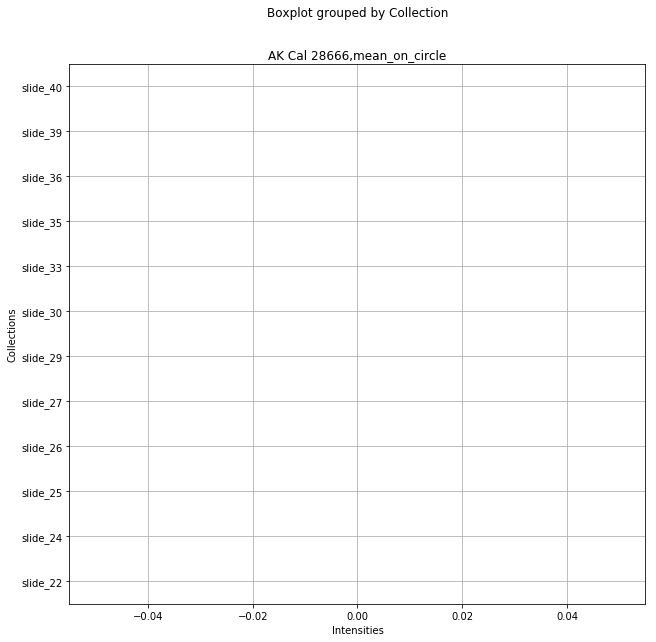

AK Cal 28667


/home/janekg89/Envs/flutype_webapp/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


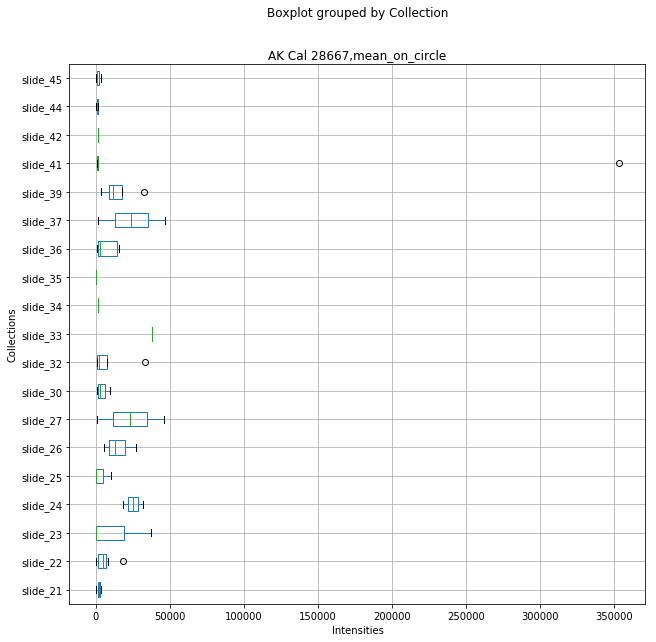

AK x31 3125


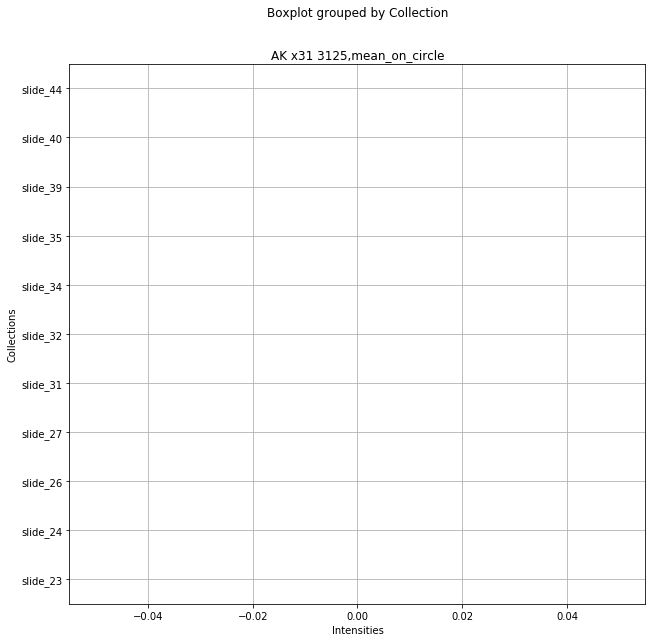

Kloeamind


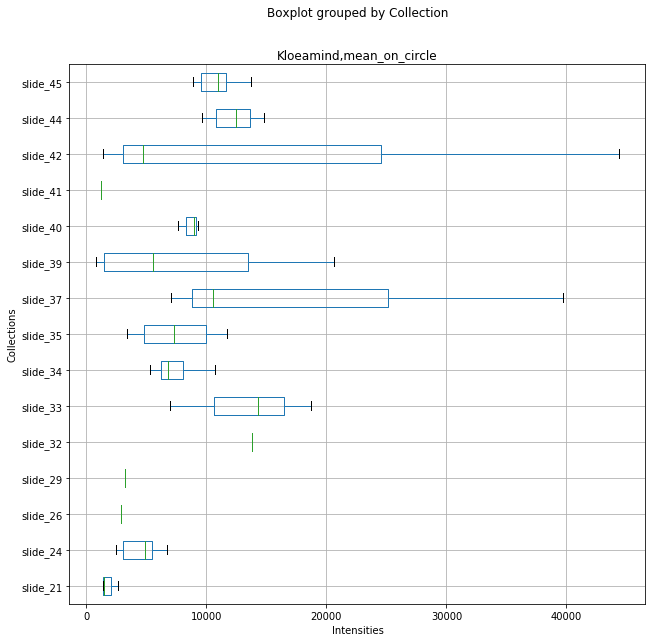

Kloes?re


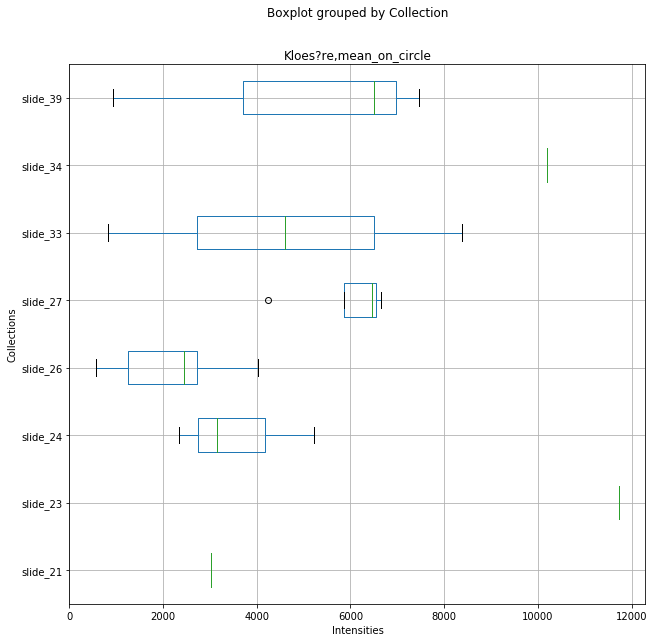

LF


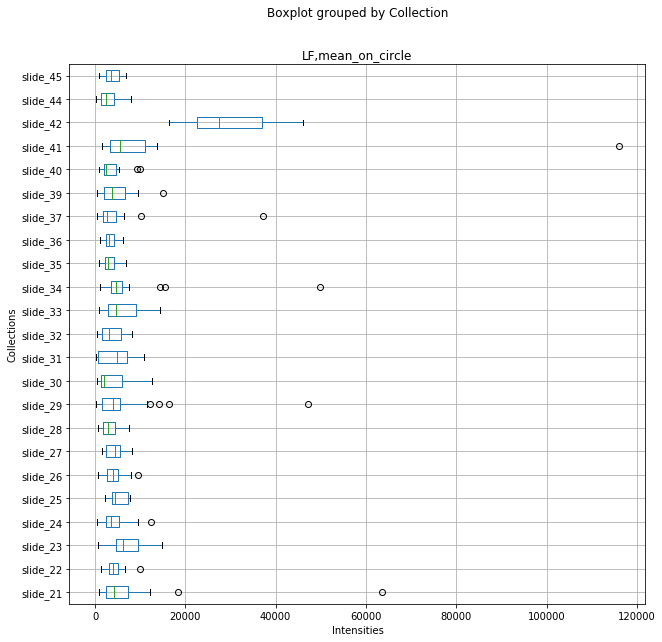

Nenad


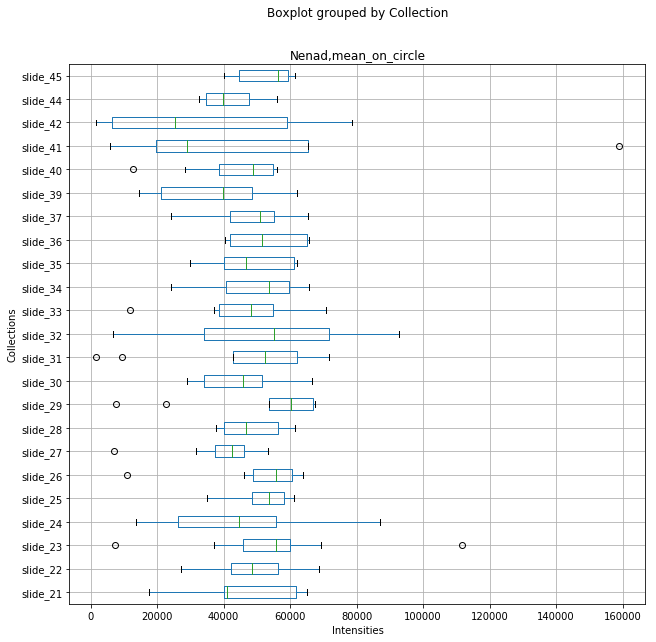

Pep_10


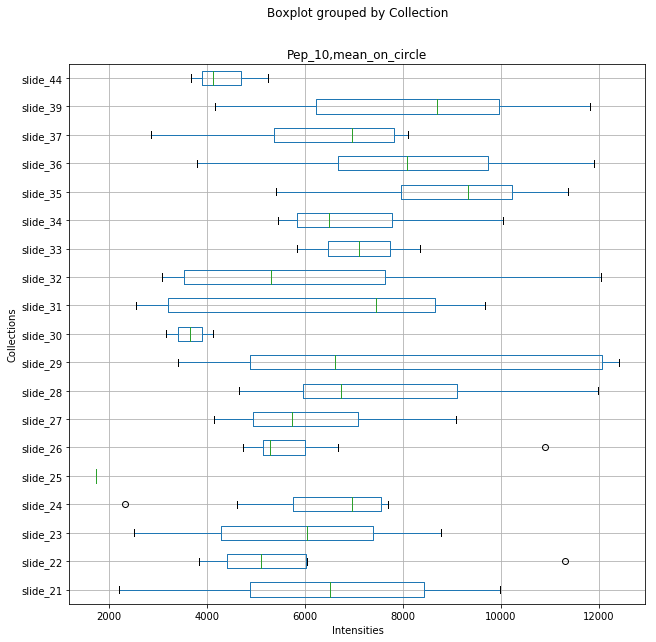

Pep_100


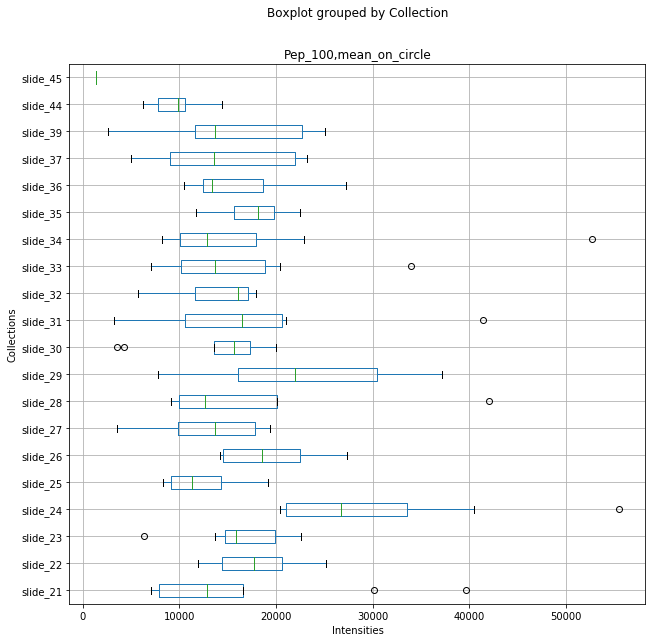

Pep_101


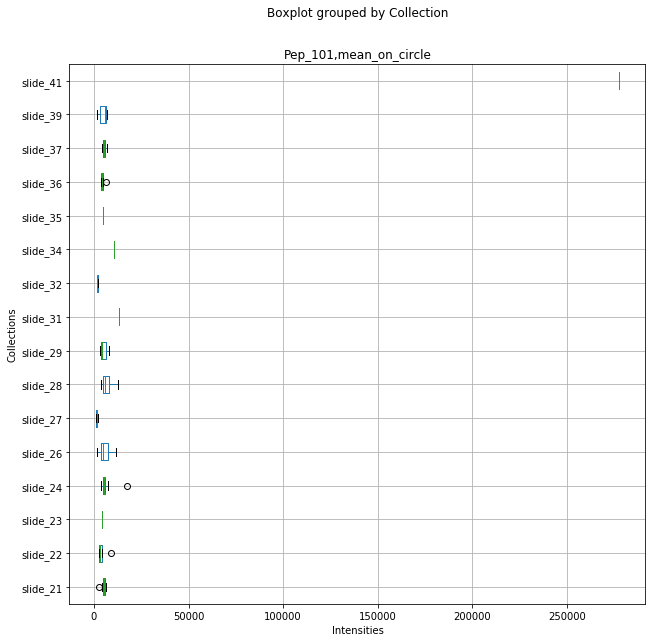

Pep_102


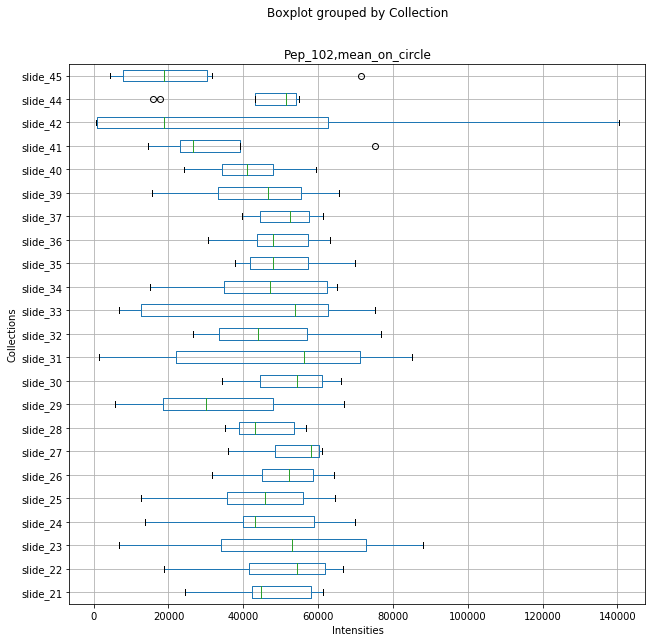

Pep_103


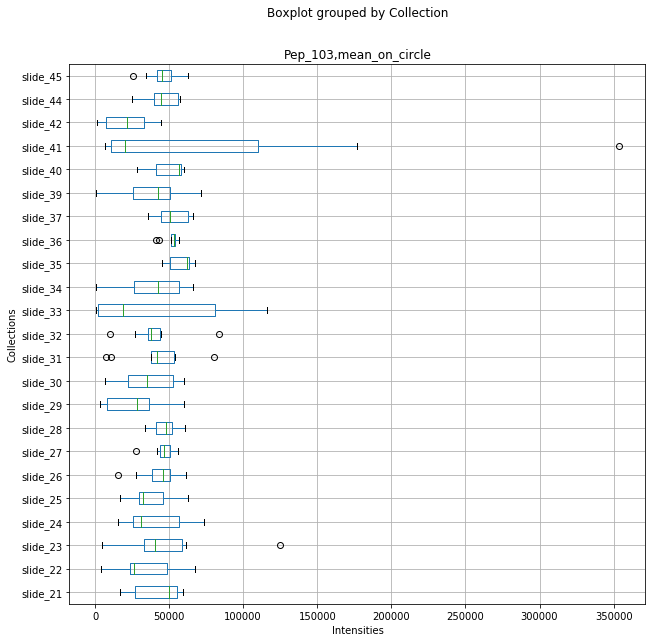

Pep_104


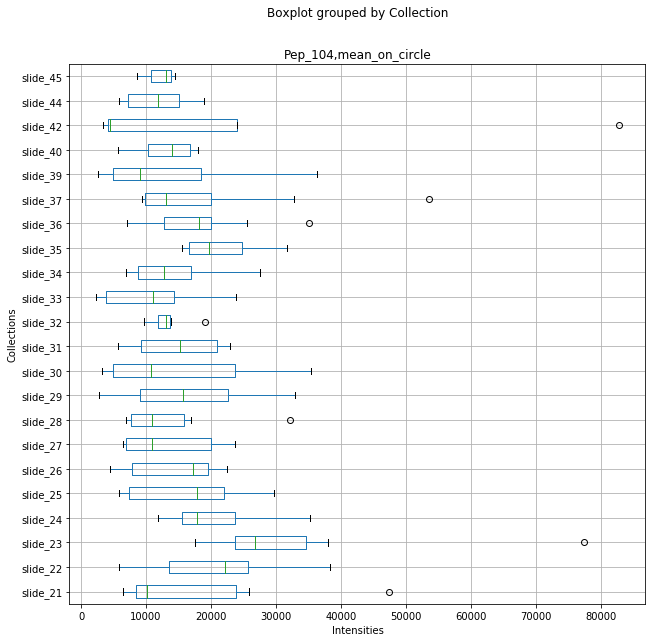

Pep_105


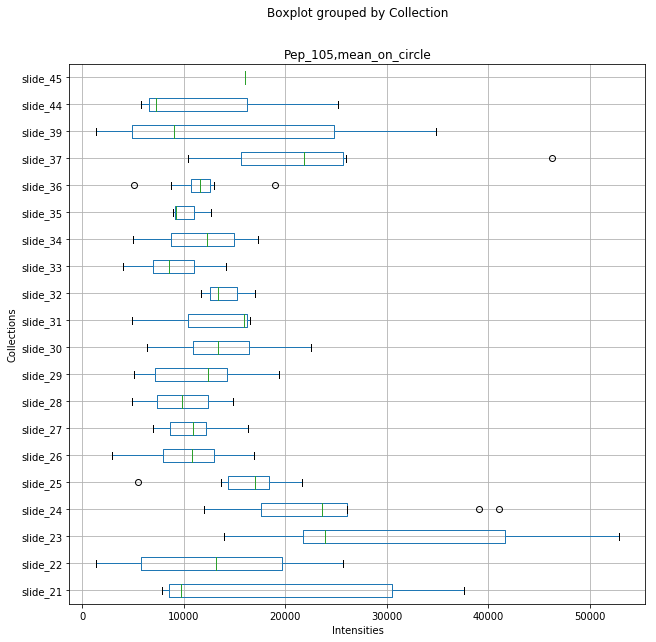

Pep_106


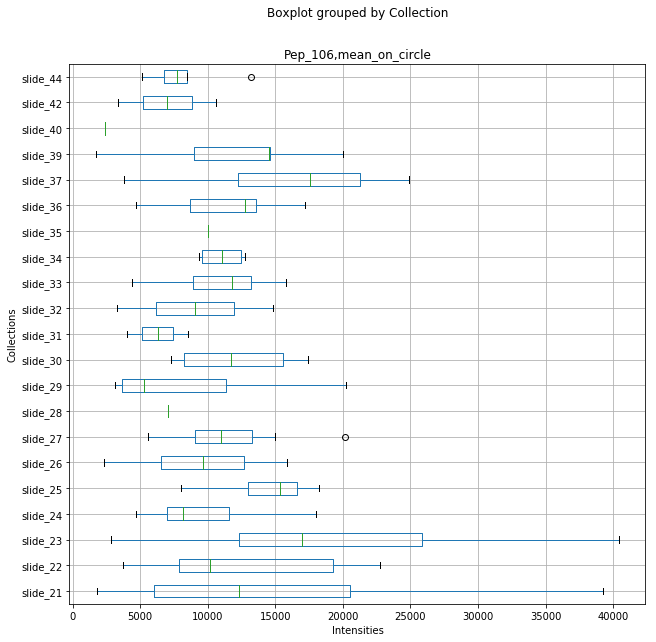

Pep_114


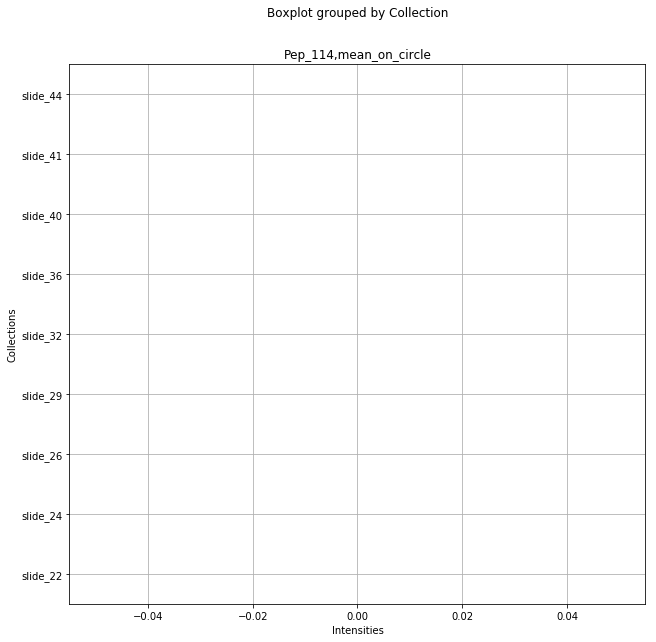

Pep_115


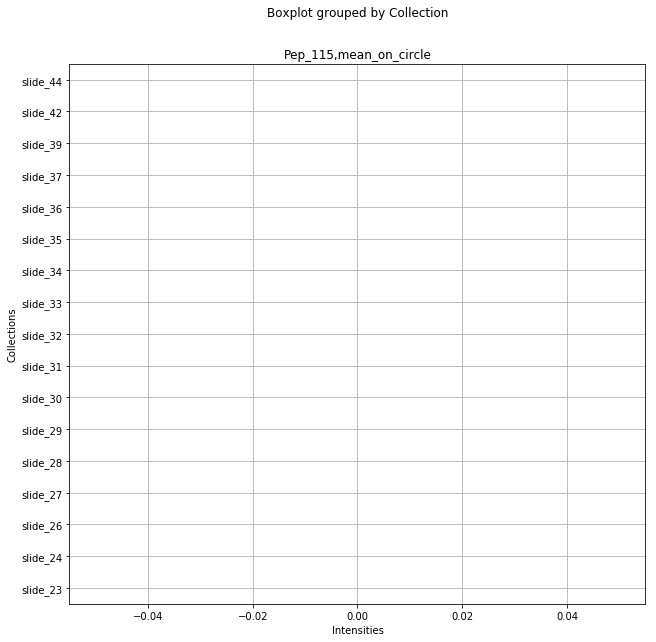

Pep_116


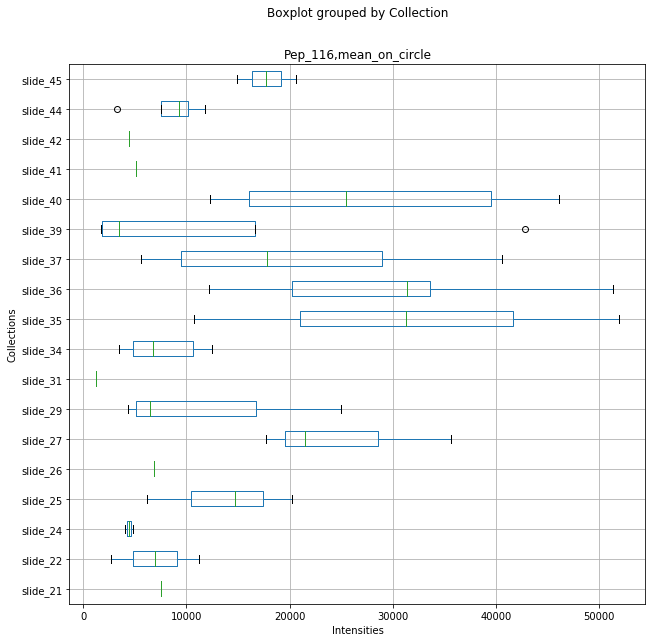

Pep_117


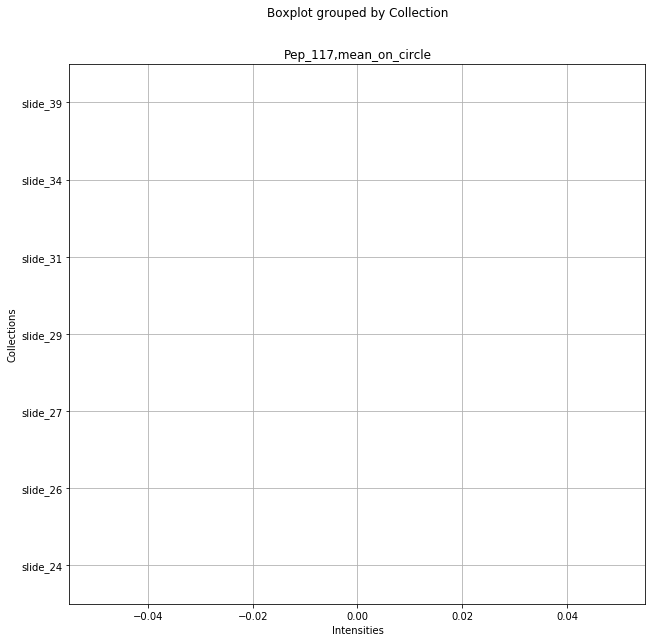

Pep_118


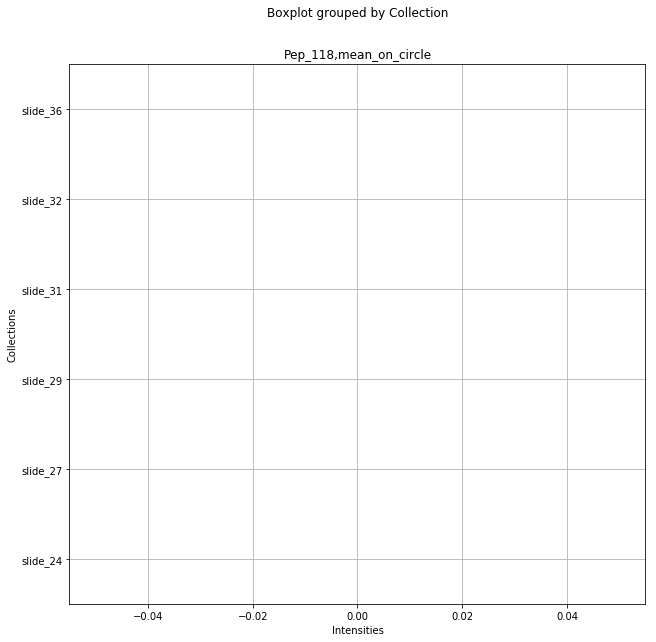

Pep_119


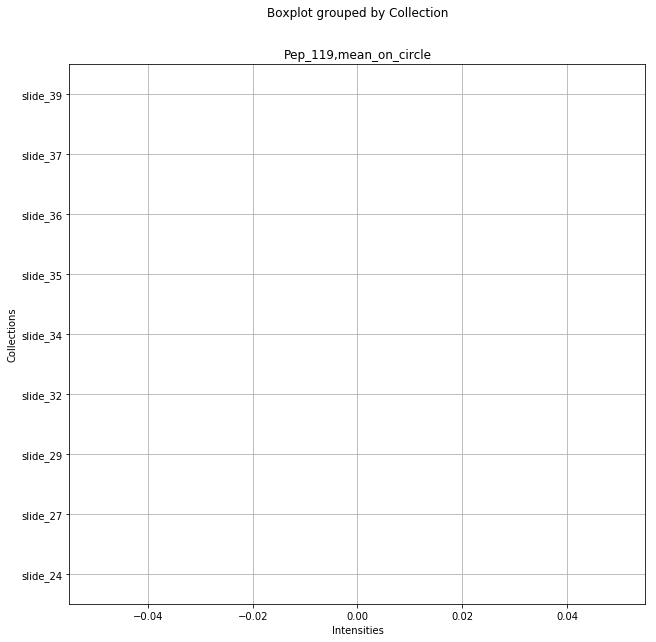

Pep_12


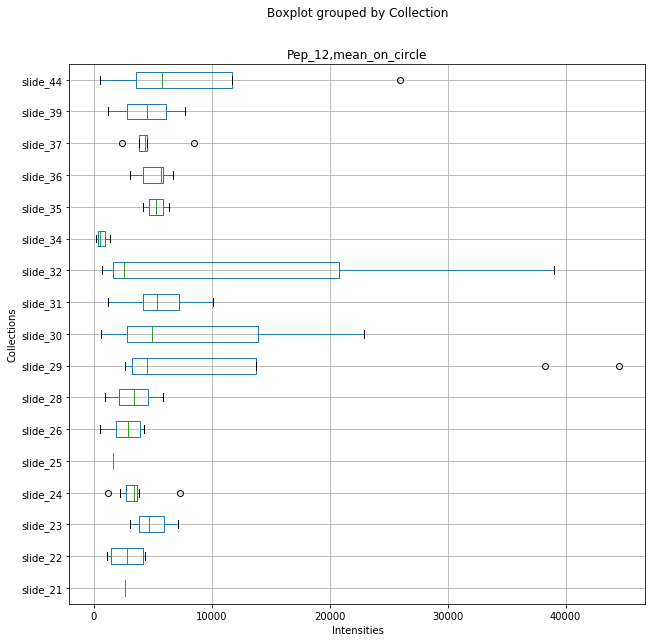

Pep_120


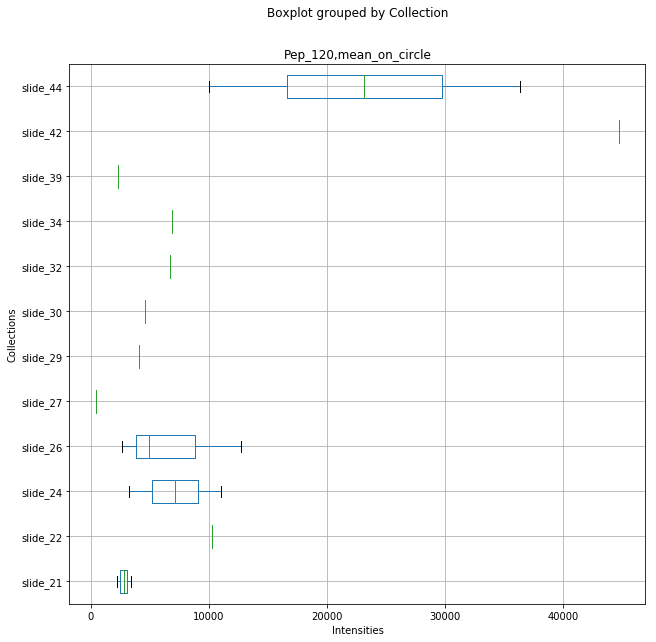

Pep_121


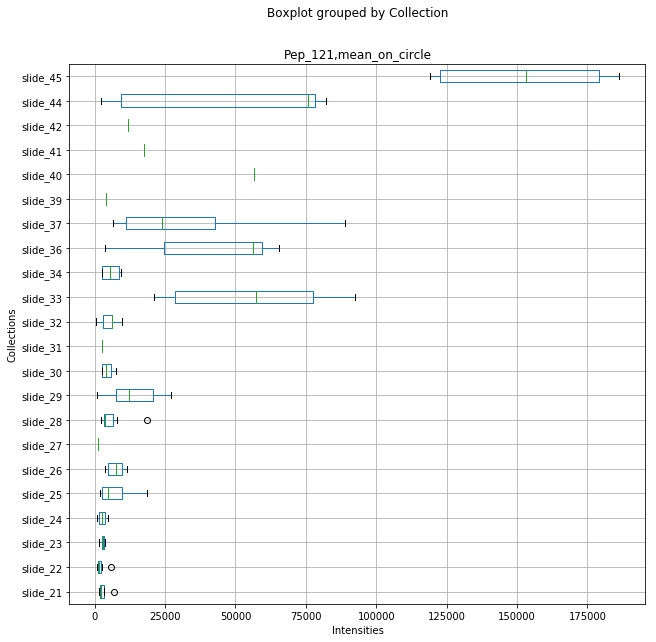

Pep_122


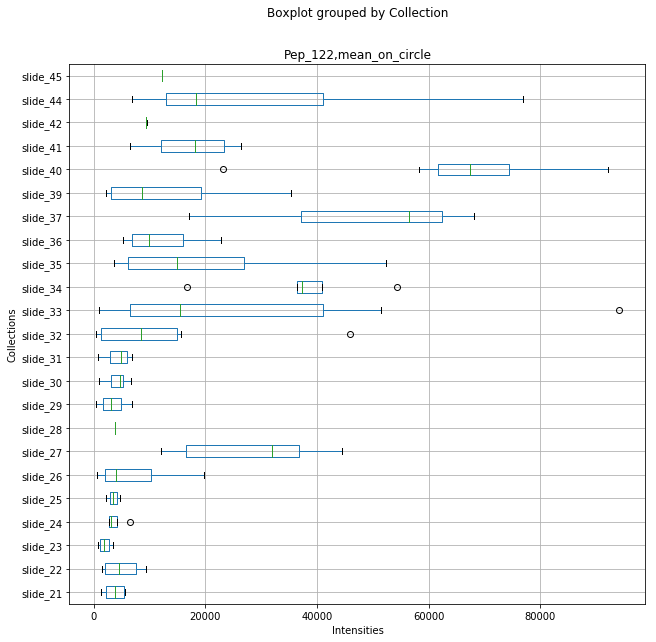

Pep_123


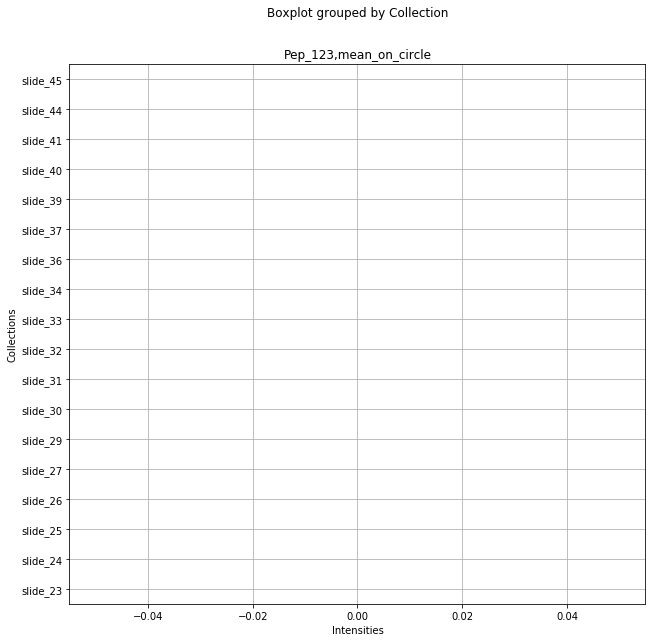

Pep_124


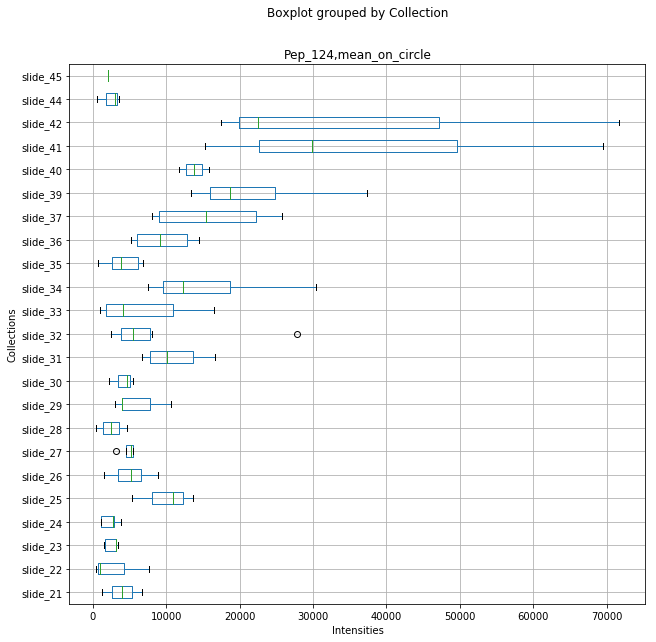

Pep_125


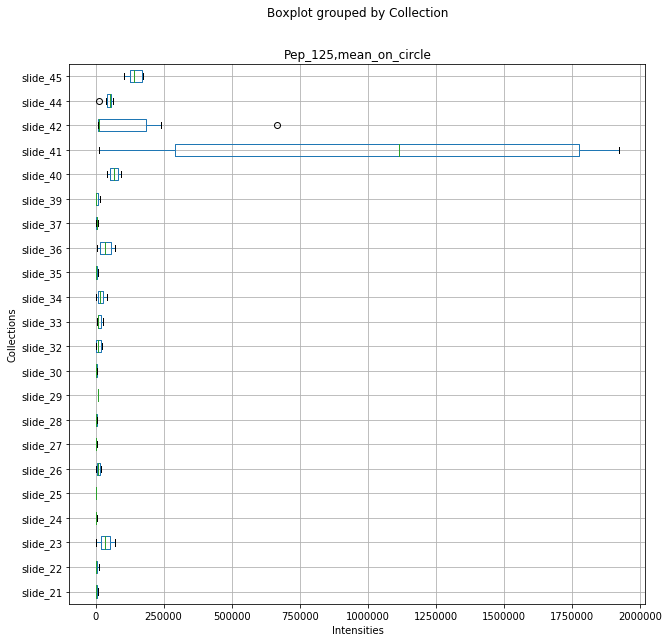

Pep_127


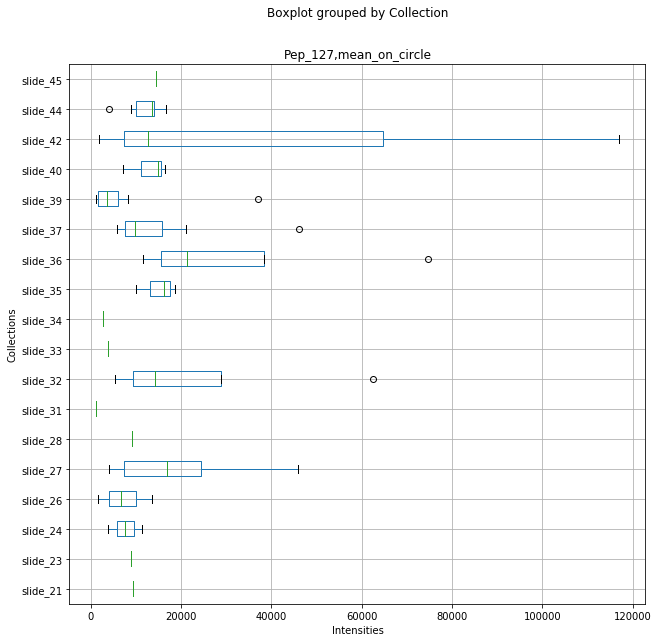

Pep_128


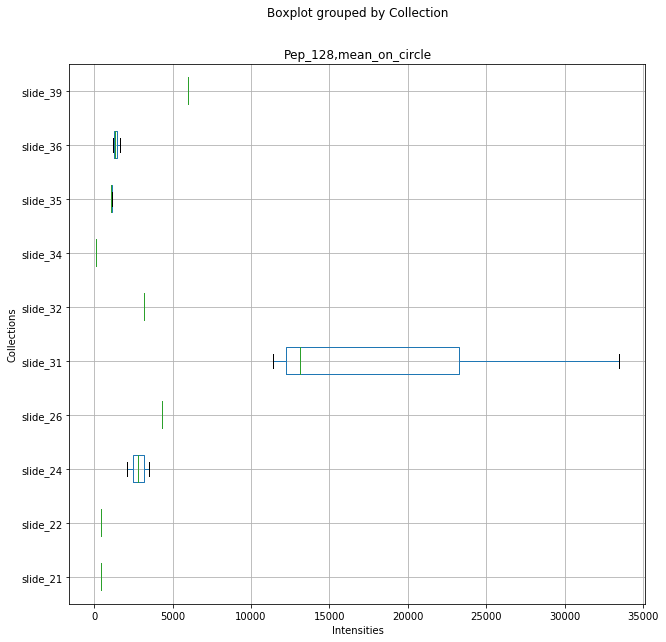

Pep_13


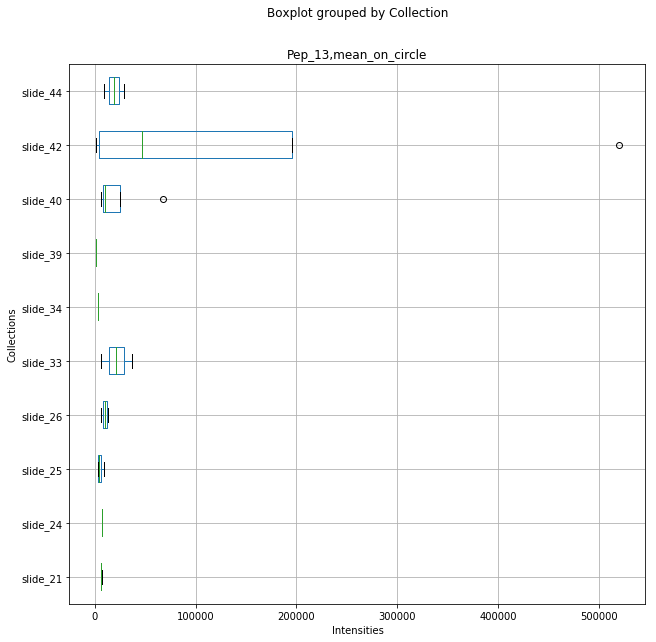

Pep_130


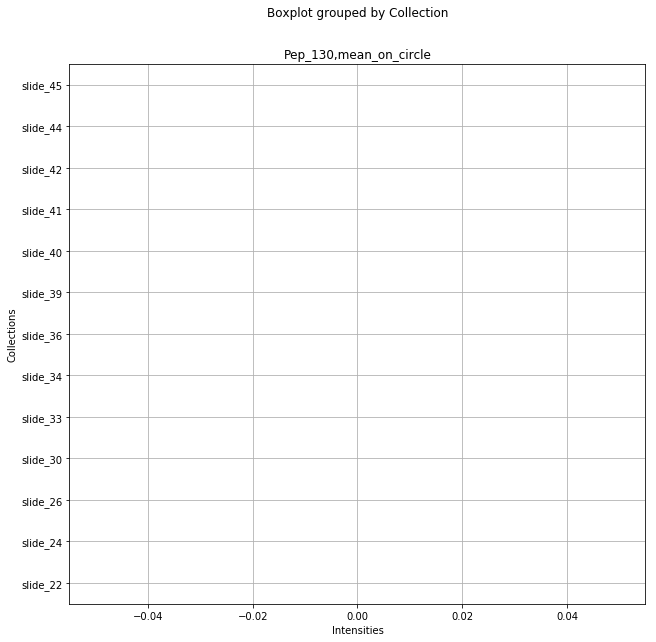

Pep_131.1


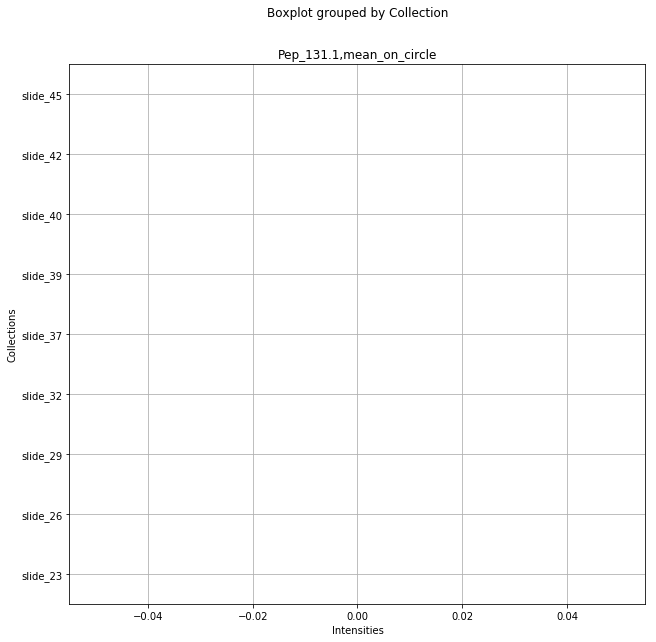

Pep_131.2


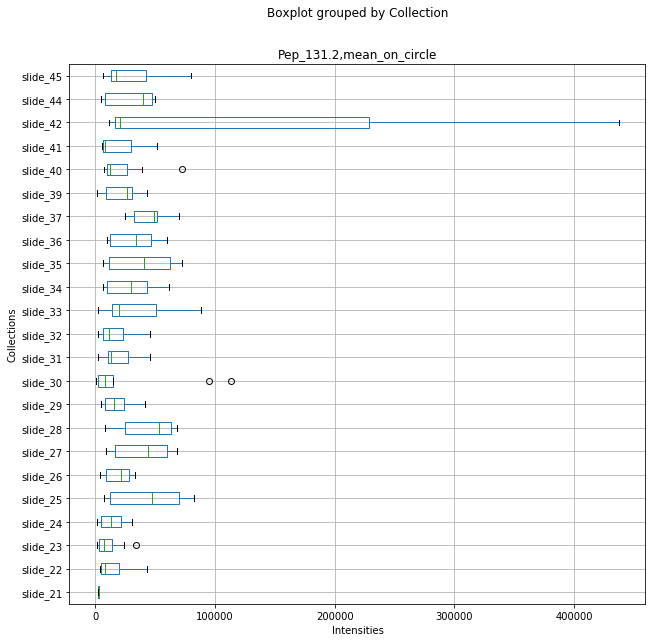

Pep_132


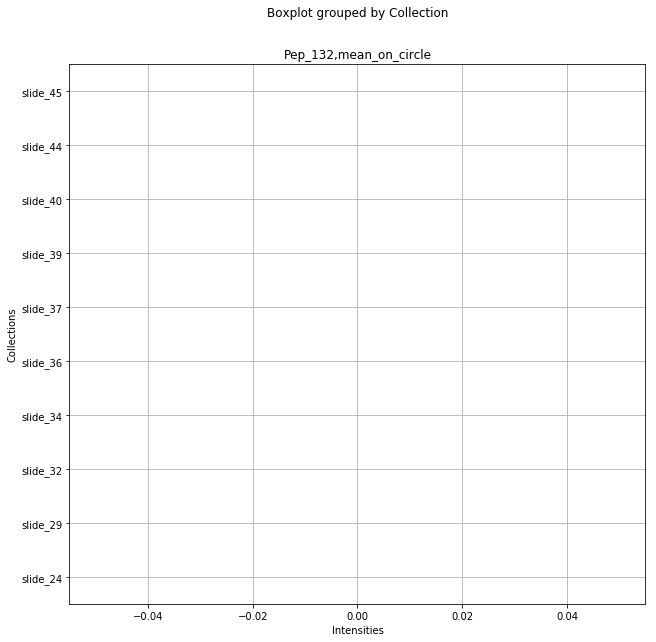

Pep_133


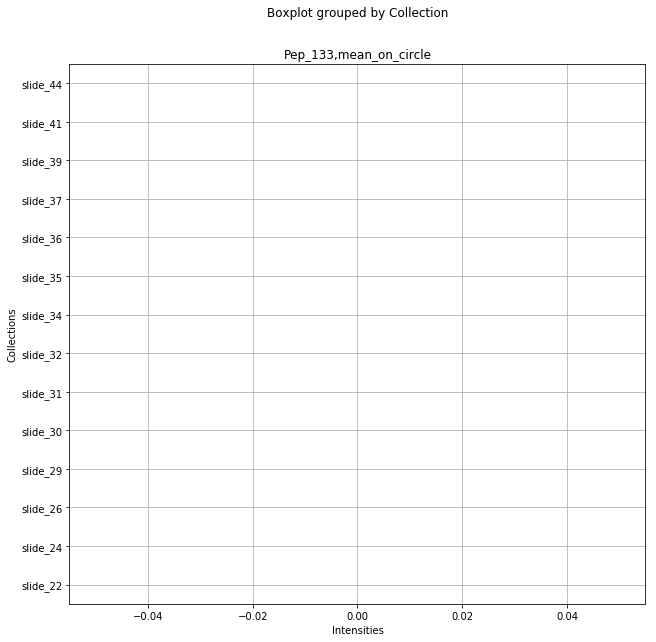

Pep_134


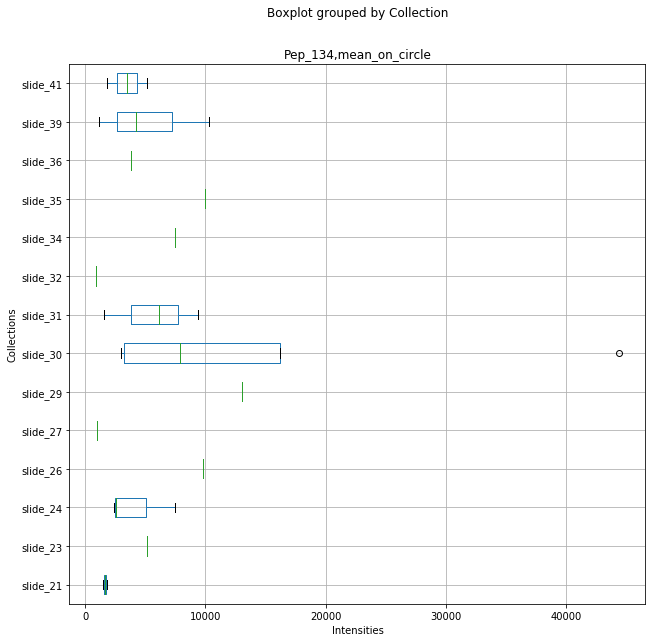

Pep_135


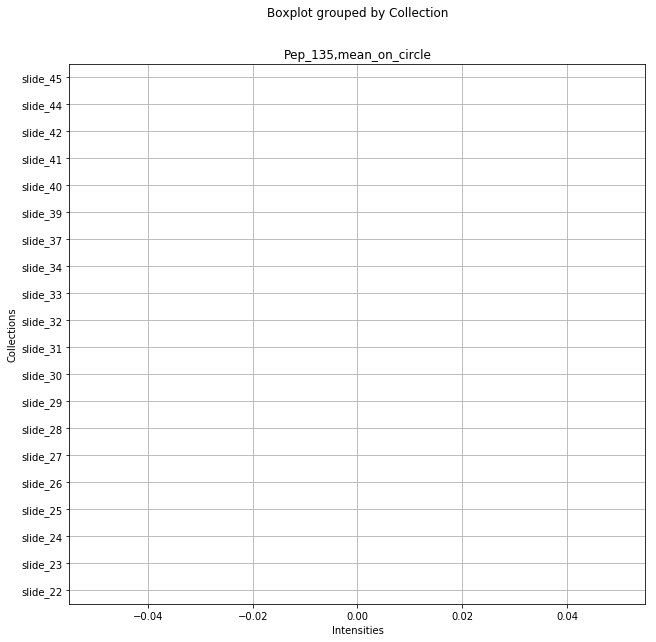

Pep_136


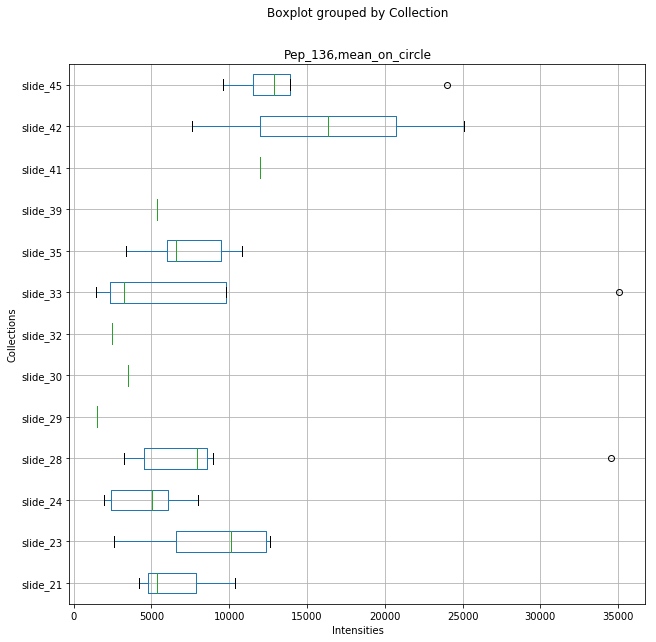

Pep_43


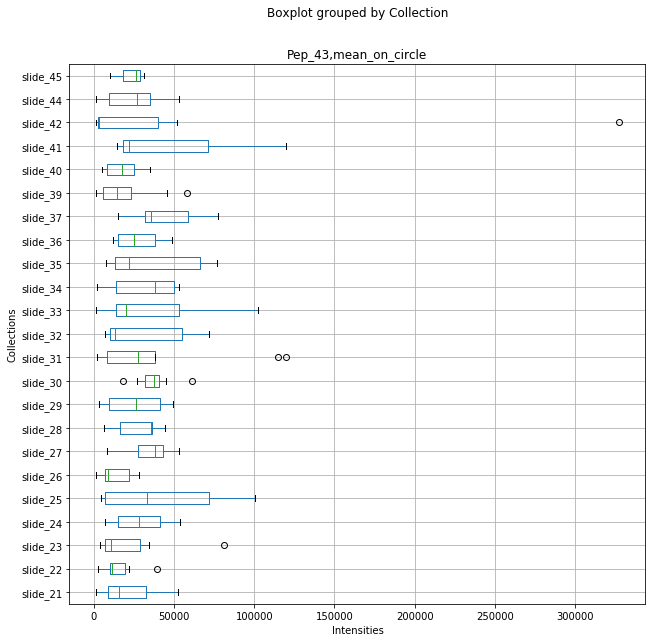

Pep_44


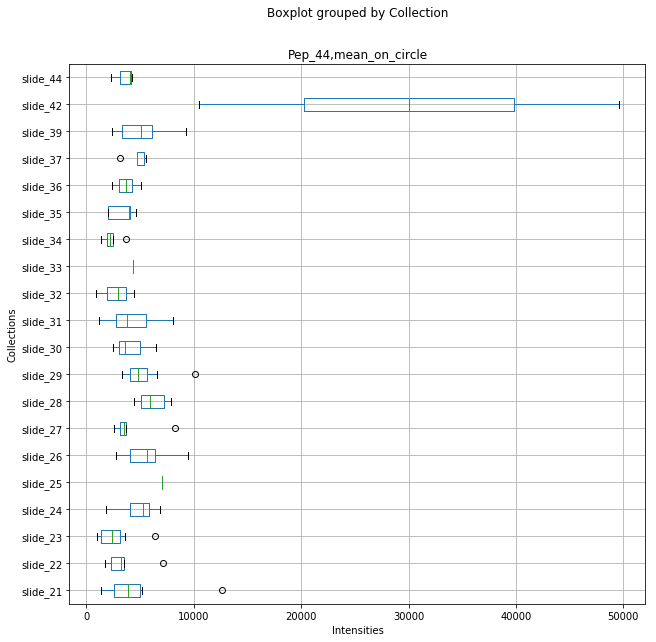

Pep_45 III


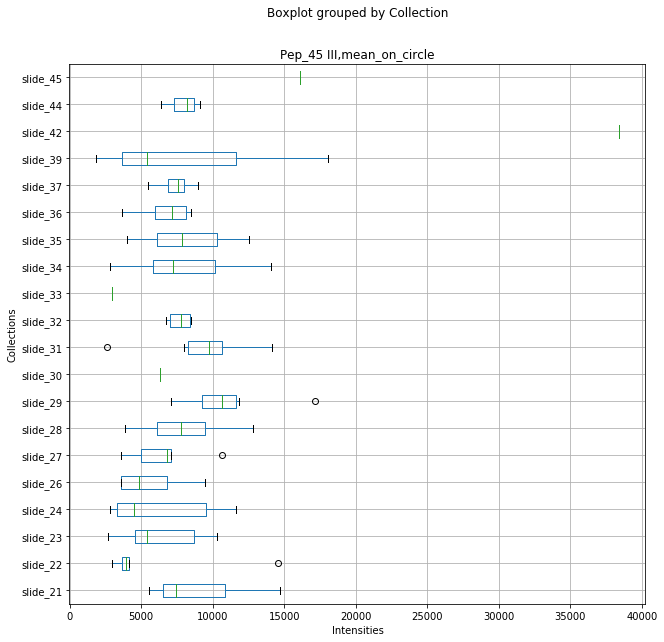

Pep_47


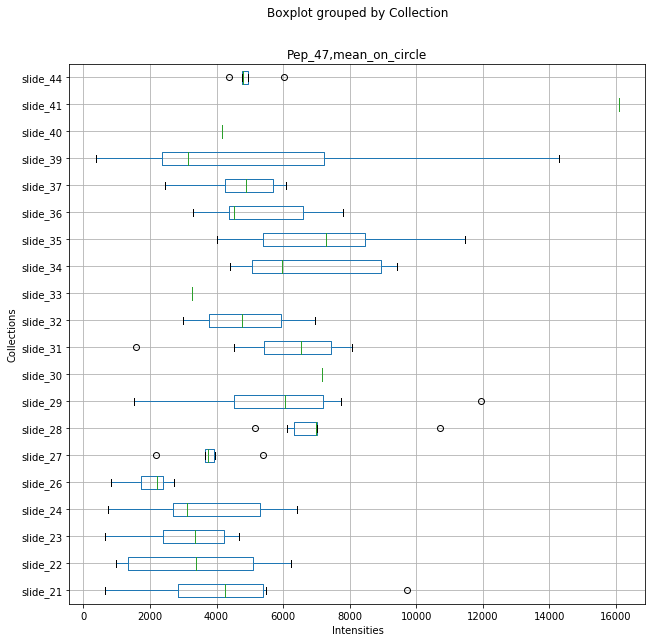

Pep_48


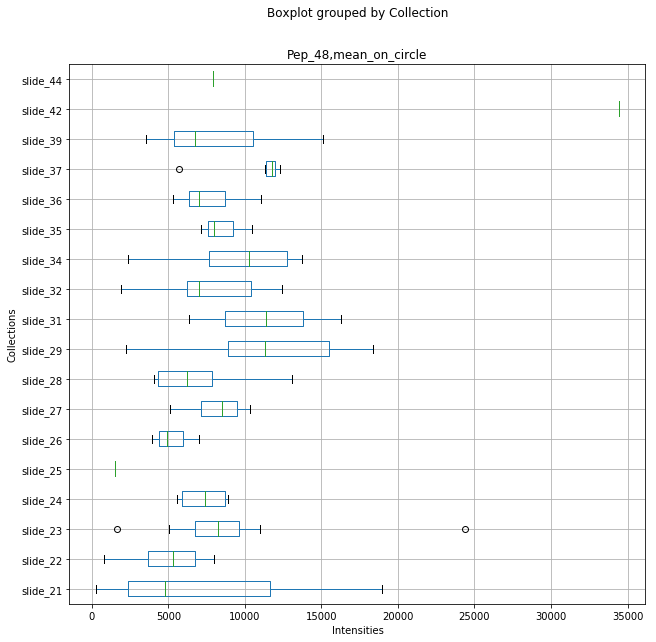

Pep_50


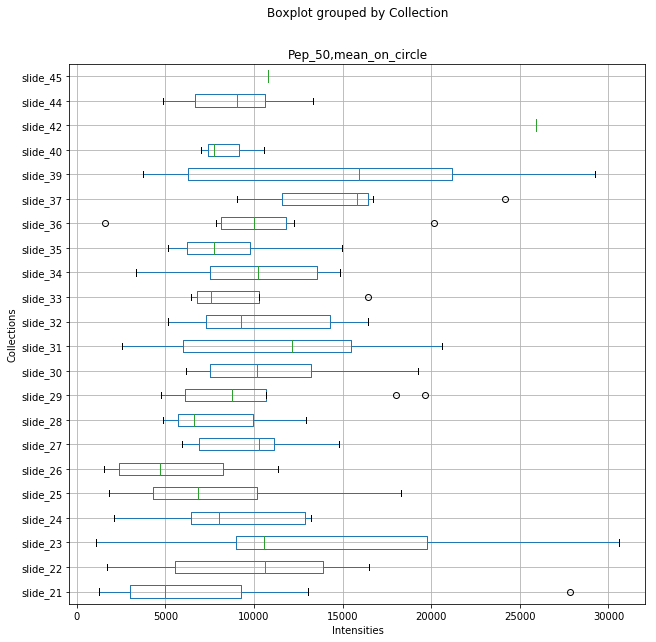

Pep_52


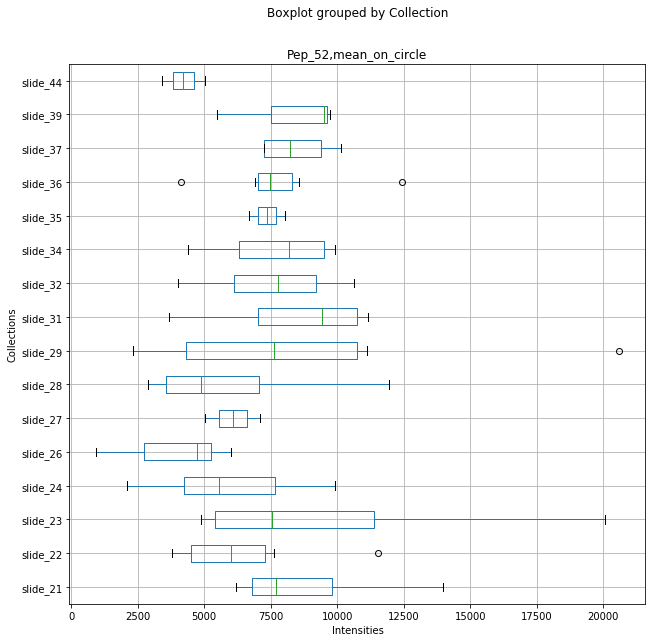

Pep_54


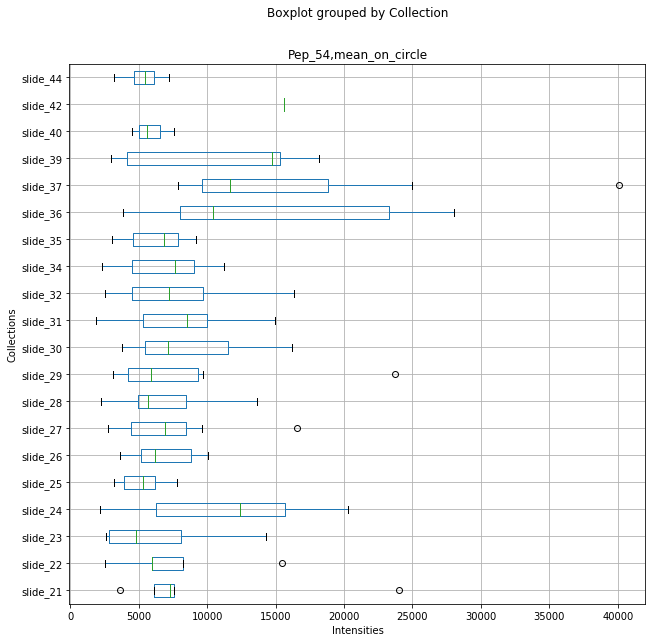

Pep_55


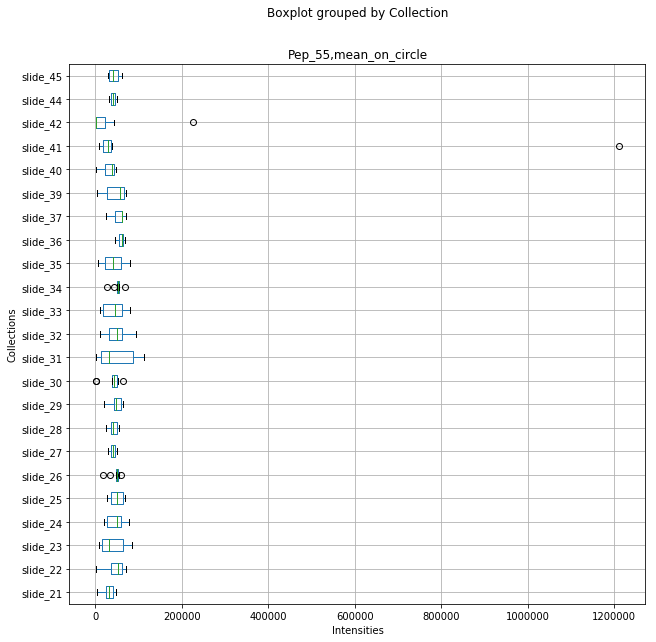

Pep_56


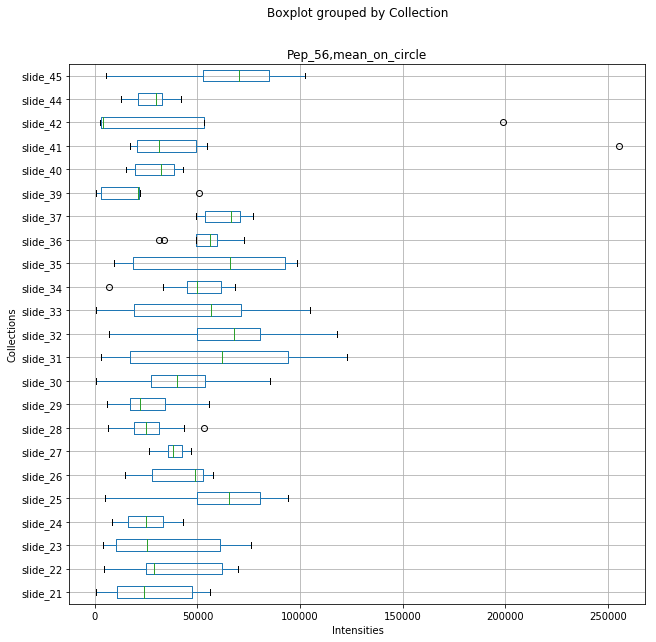

Pep_57


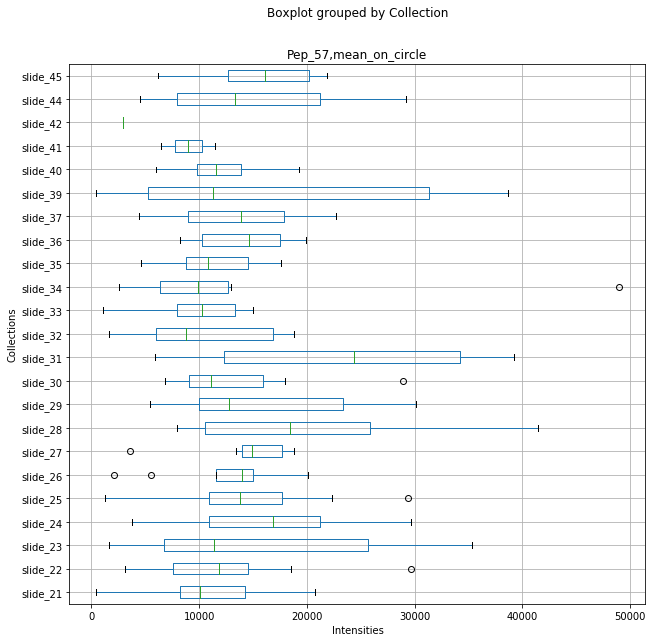

Pep_59


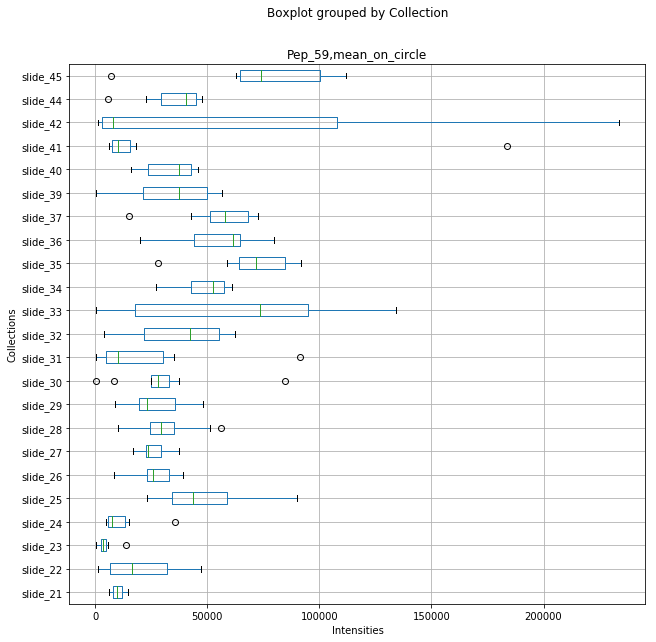

Pep_60


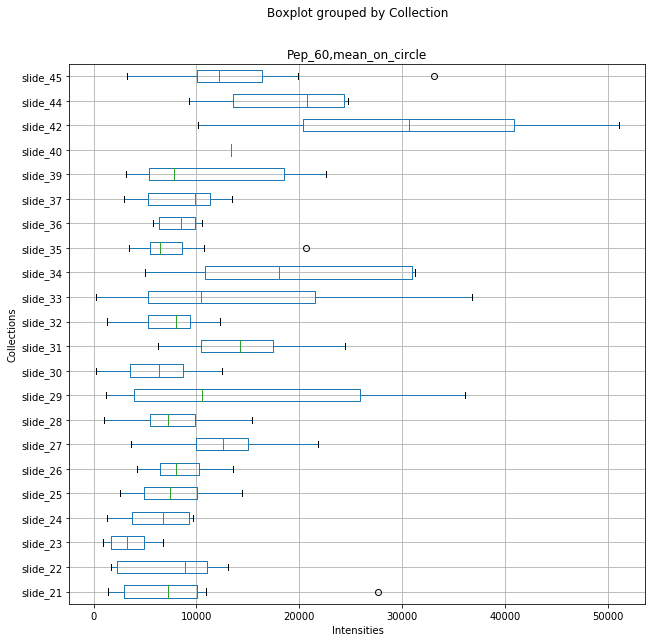

Pep_61


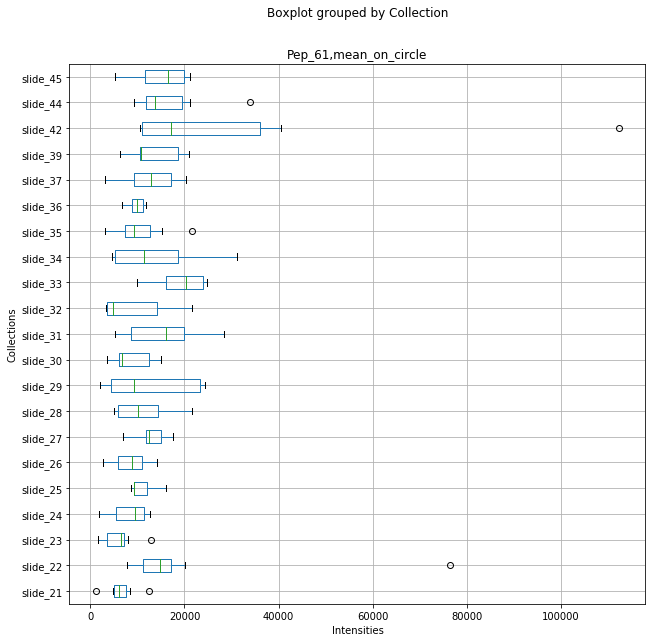

Pep_63


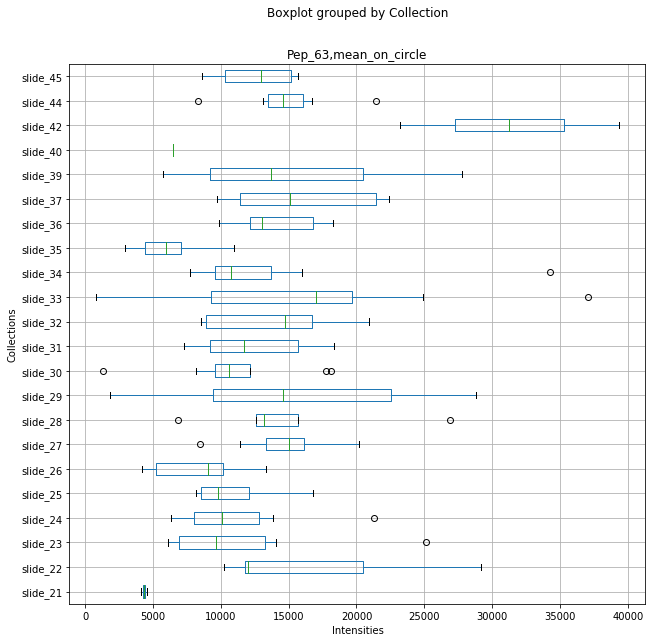

Pep_65


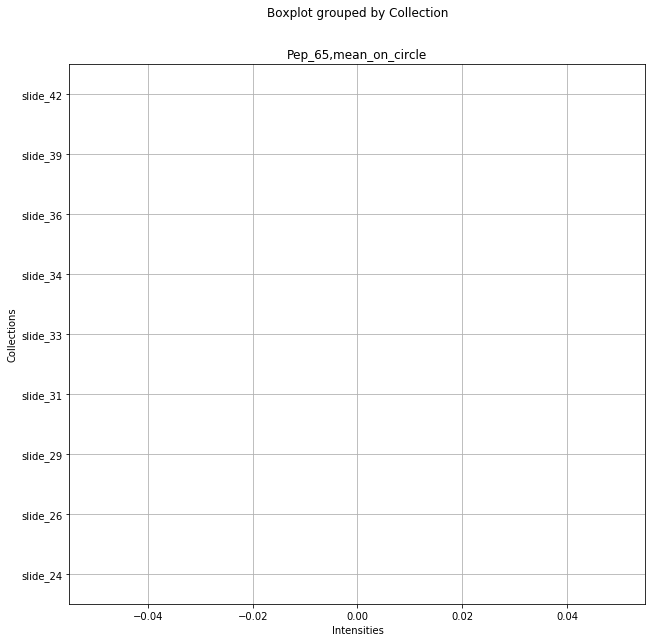

Pep_66


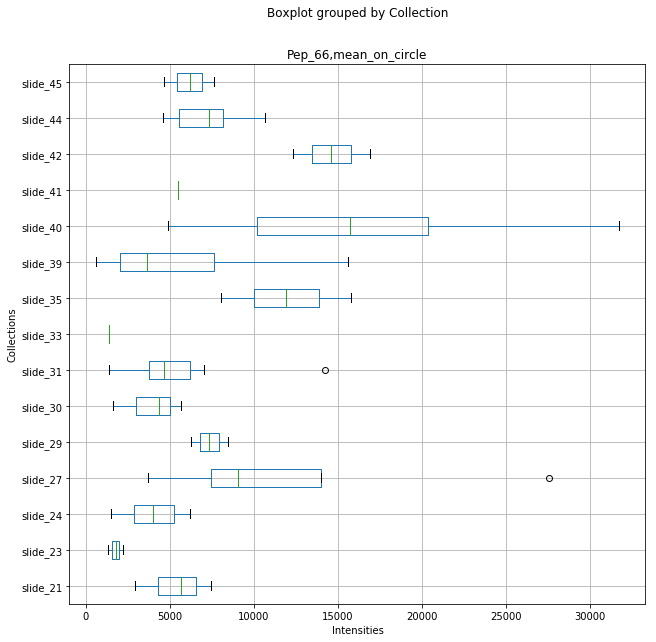

Pep_67


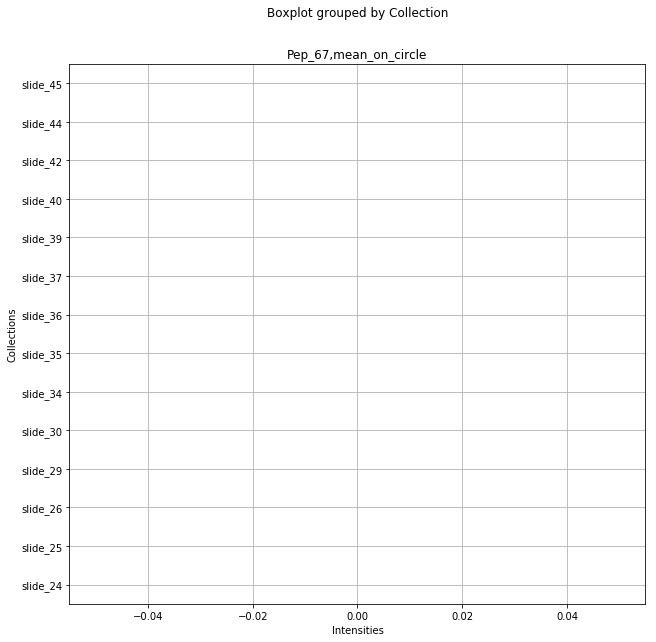

Pep_68


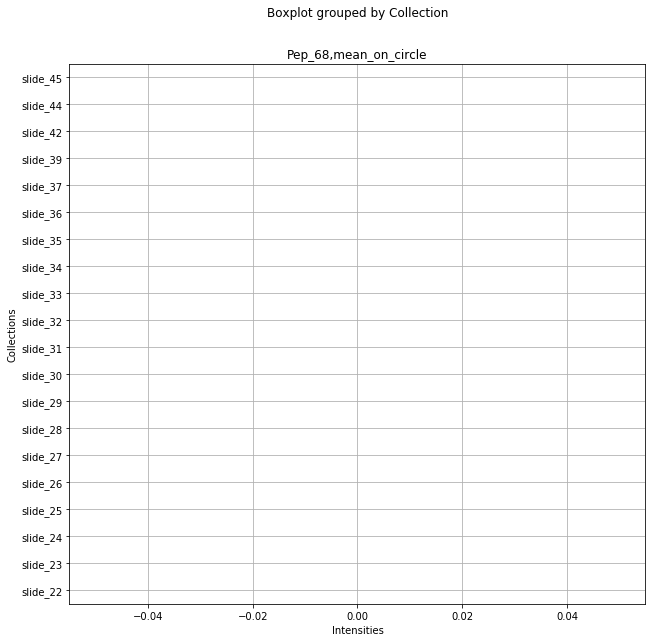

Pep_69


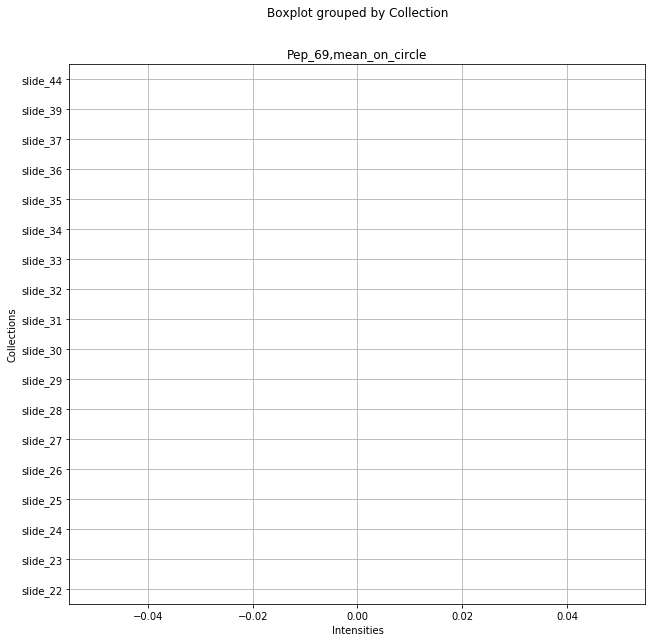

Pep_7


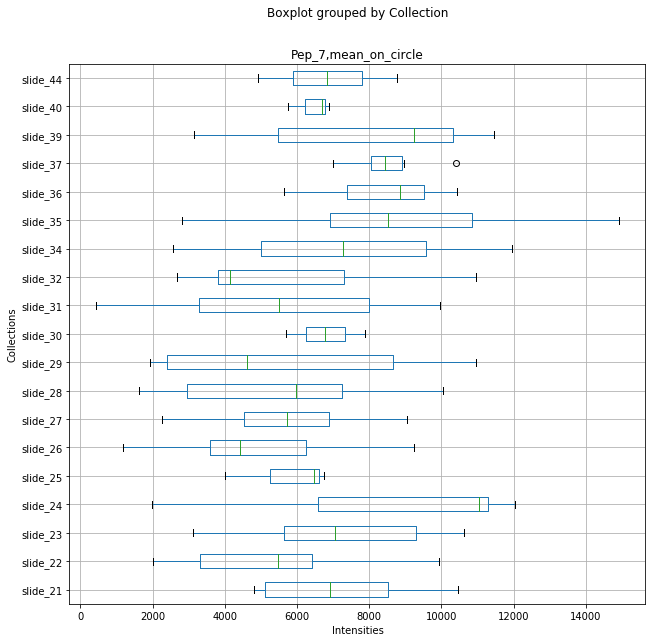

Pep_70


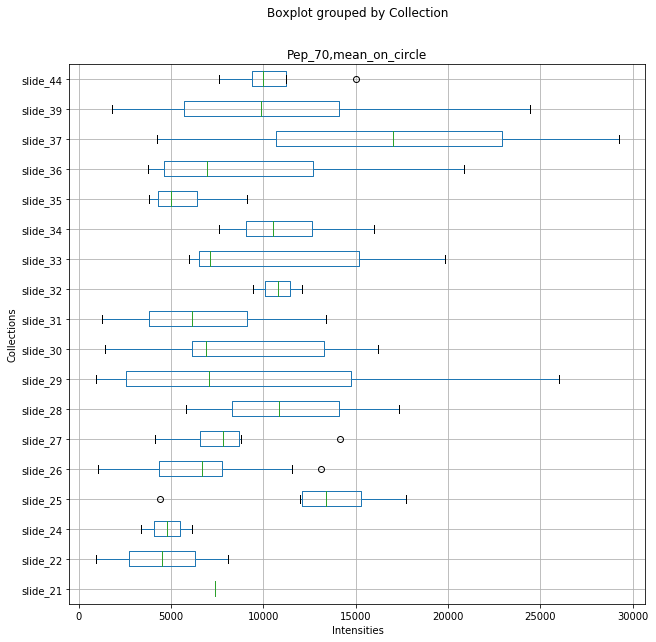

Pep_71


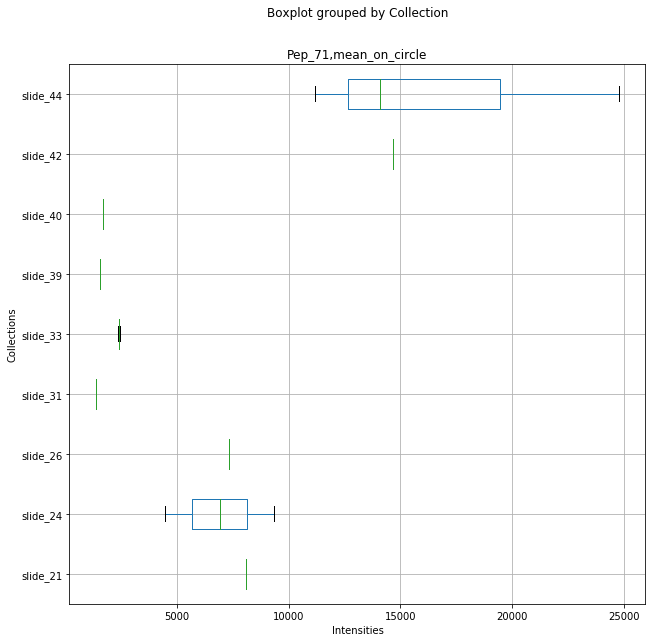

Pep_72


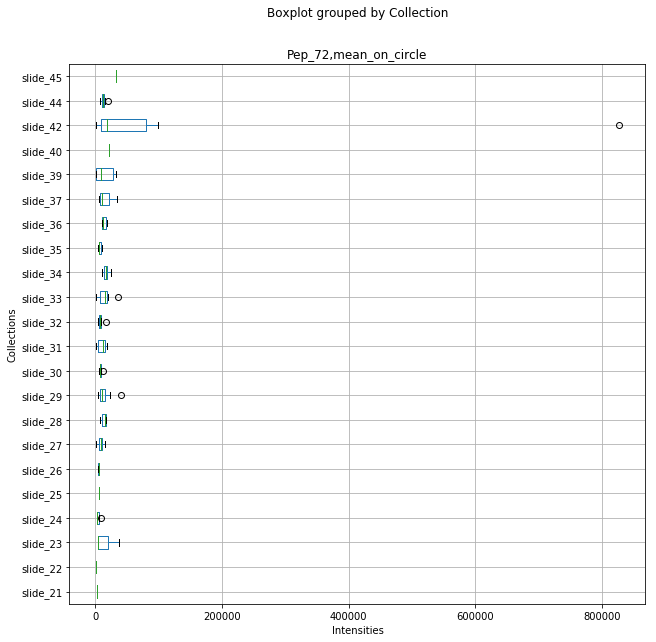

Pep_73


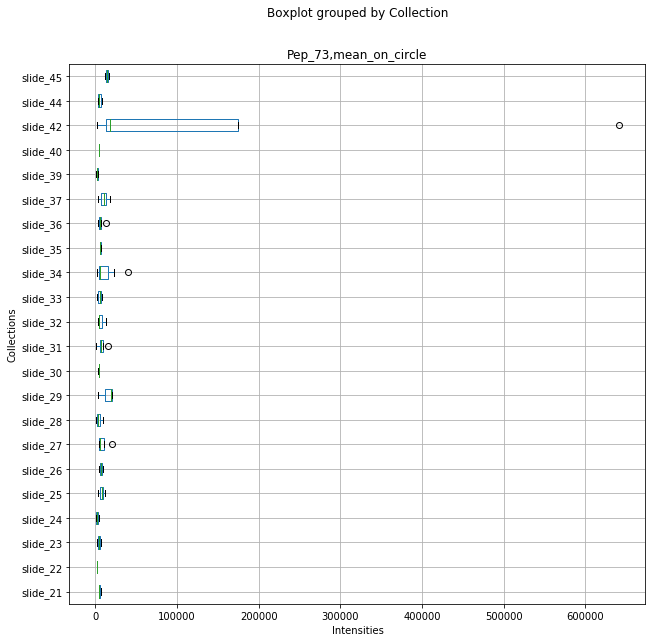

Pep_74


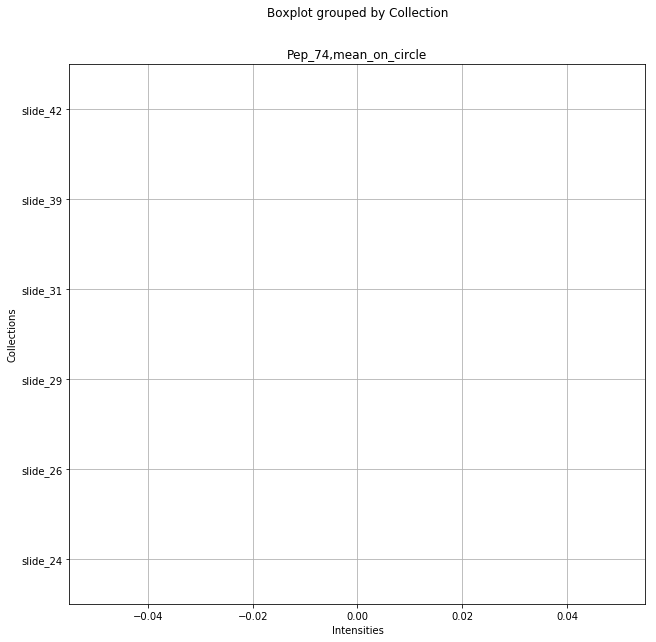

Pep_75


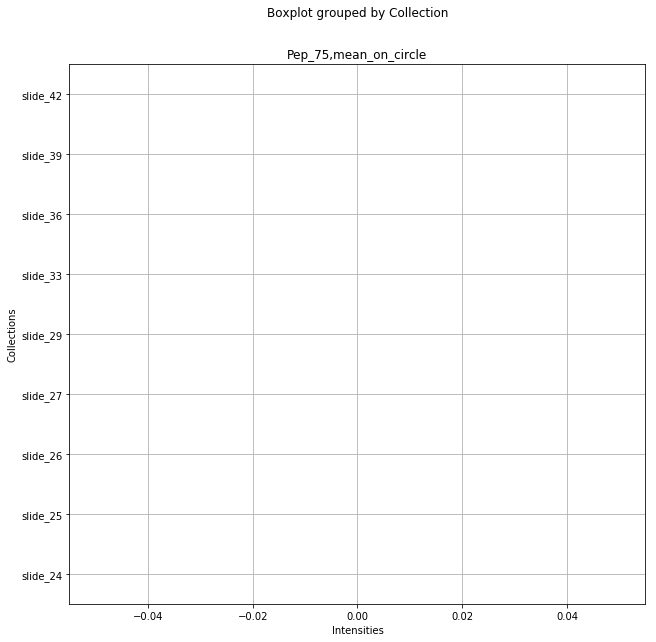

Pep_76


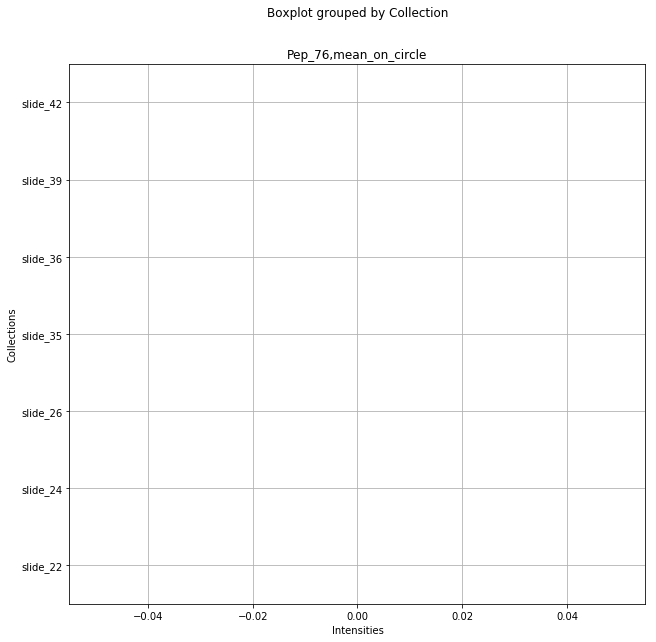

Pep_77


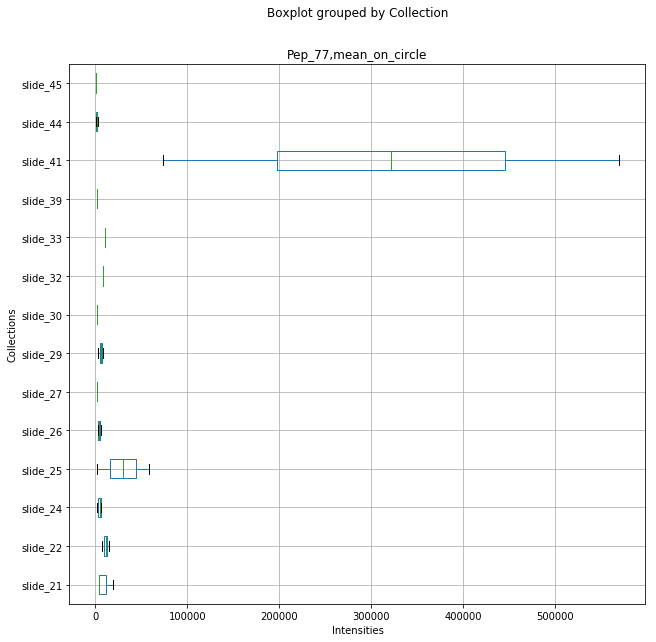

Pep_8


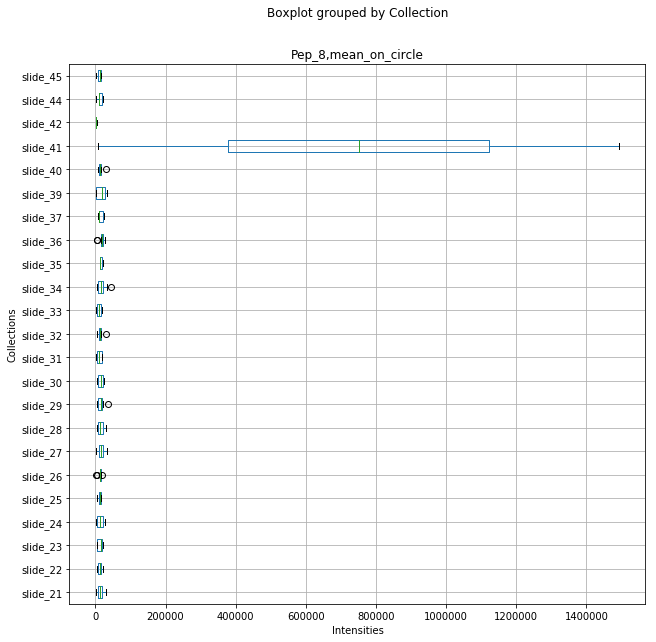

Pep_80


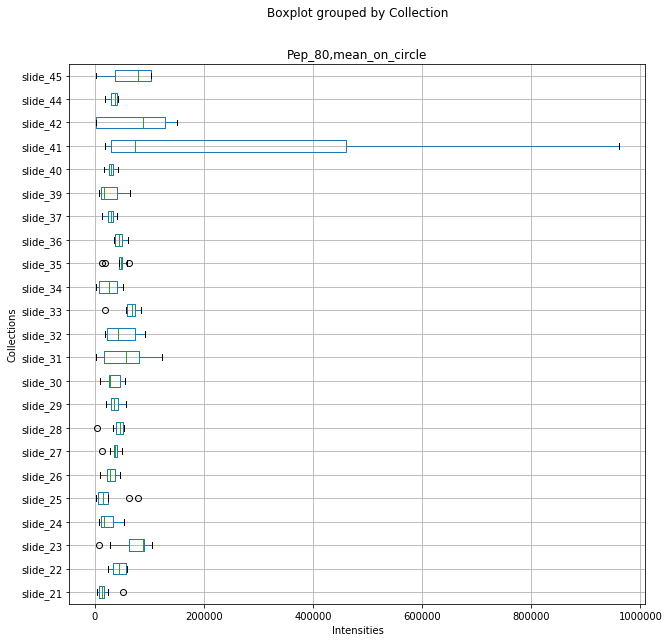

Pep_81


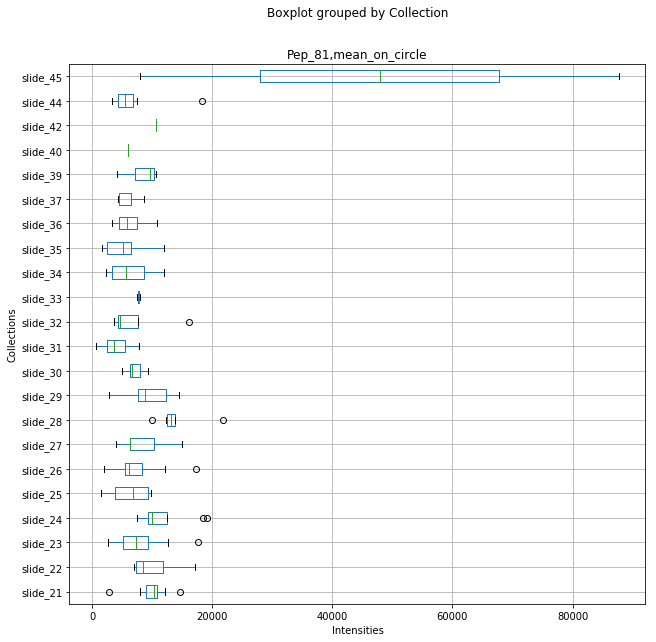

Pep_82


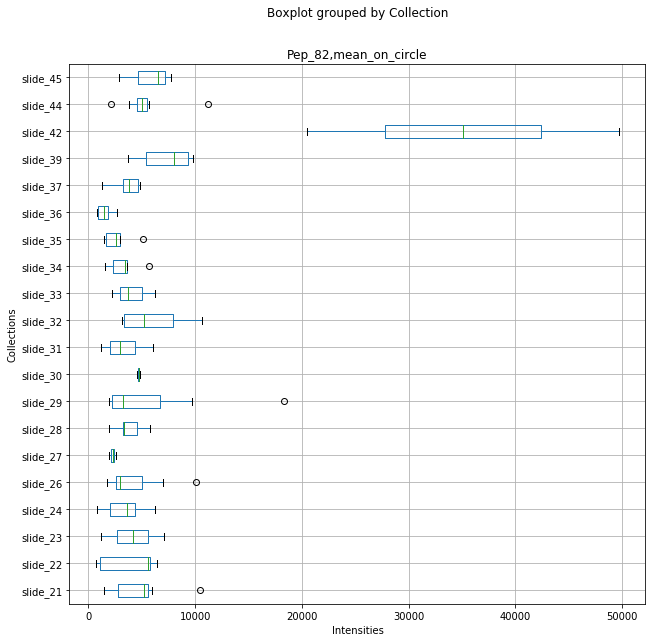

Pep_83


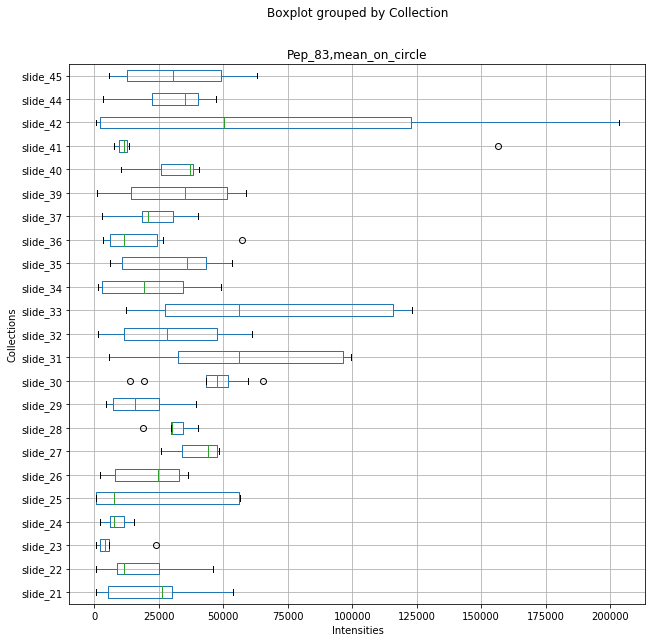

Pep_84


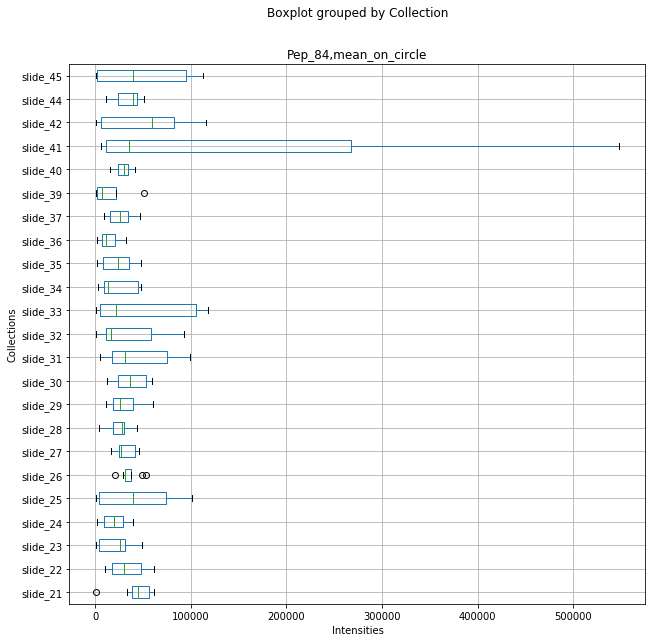

Pep_86


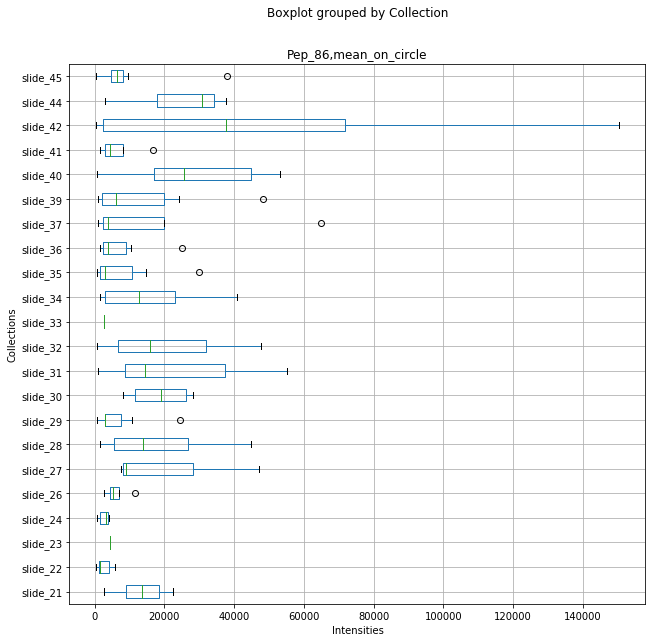

Pep_88


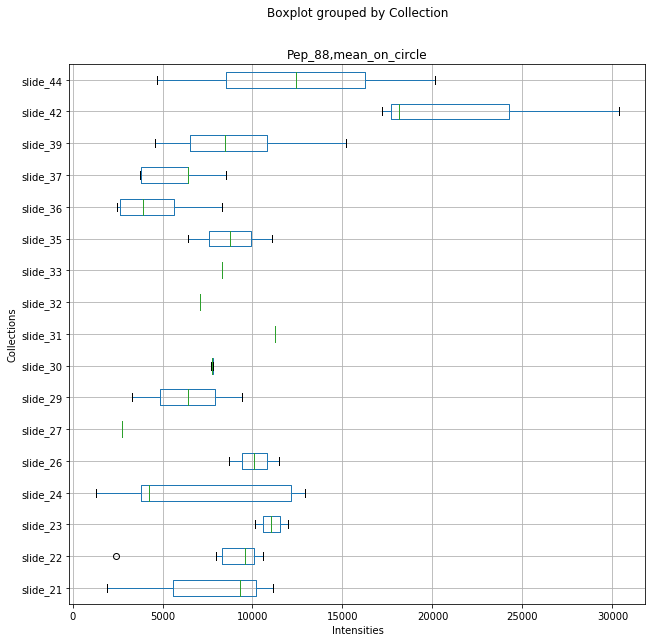

Pep_89


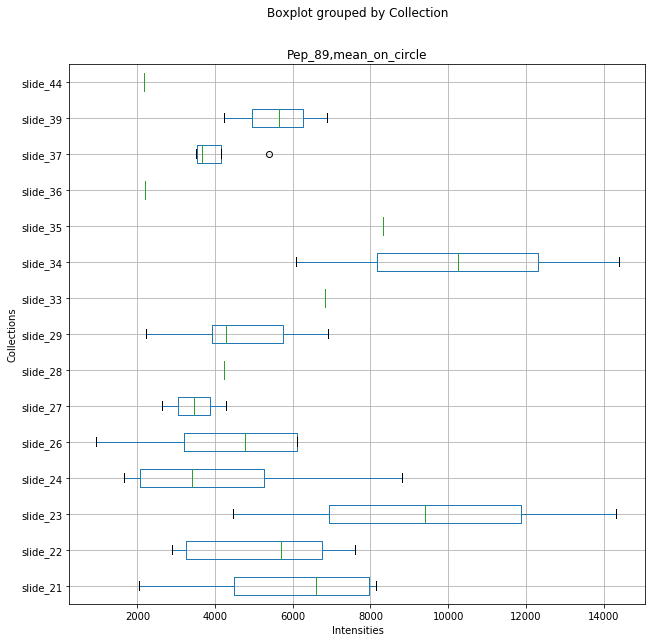

Pep_9


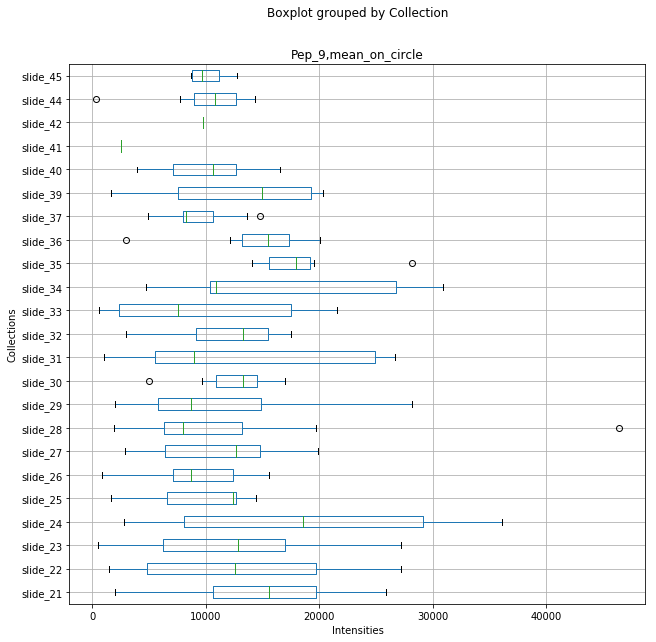

Pep_90


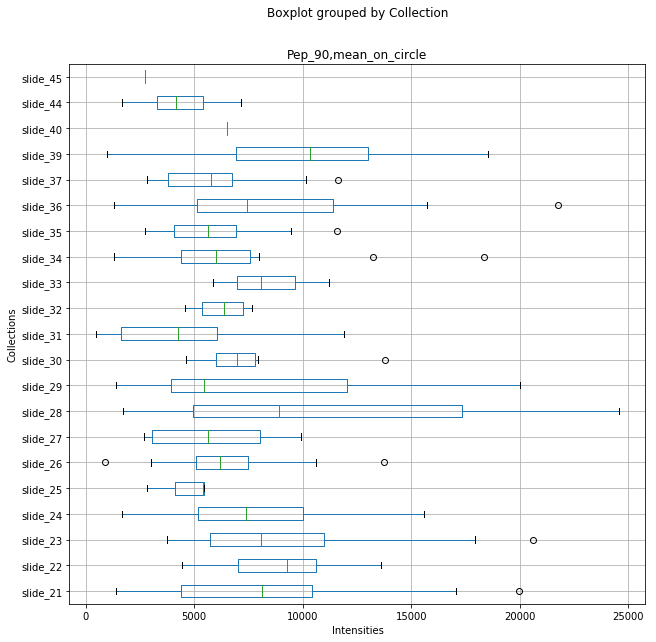

Pep_91


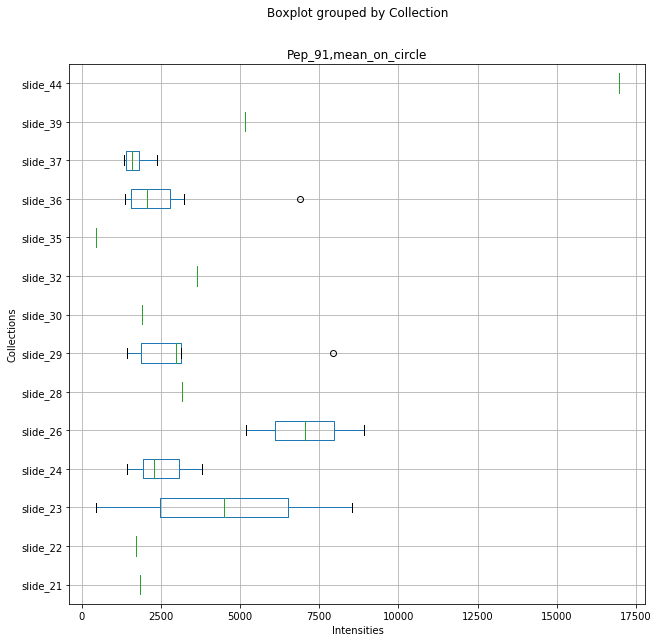

Pep_94


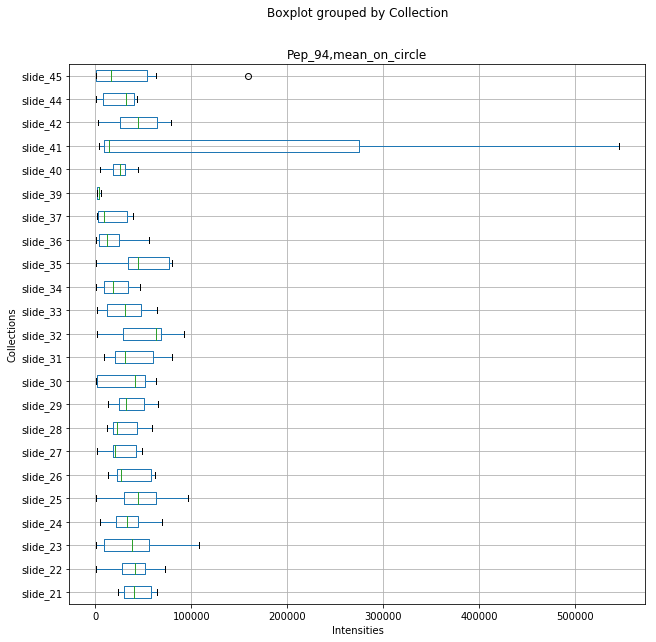

Pep_95


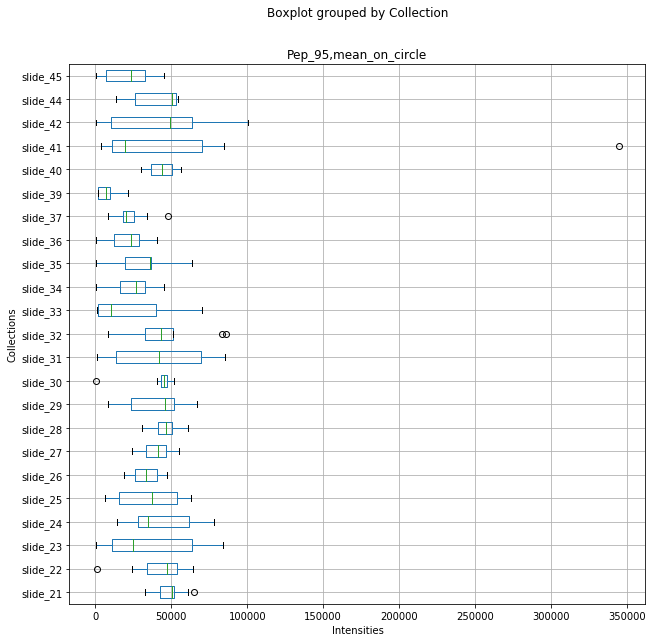

Pep_96


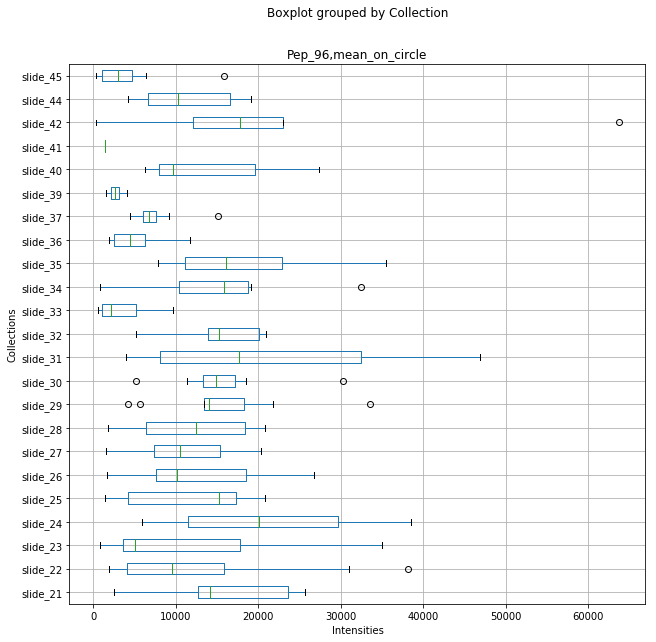

Pep_98


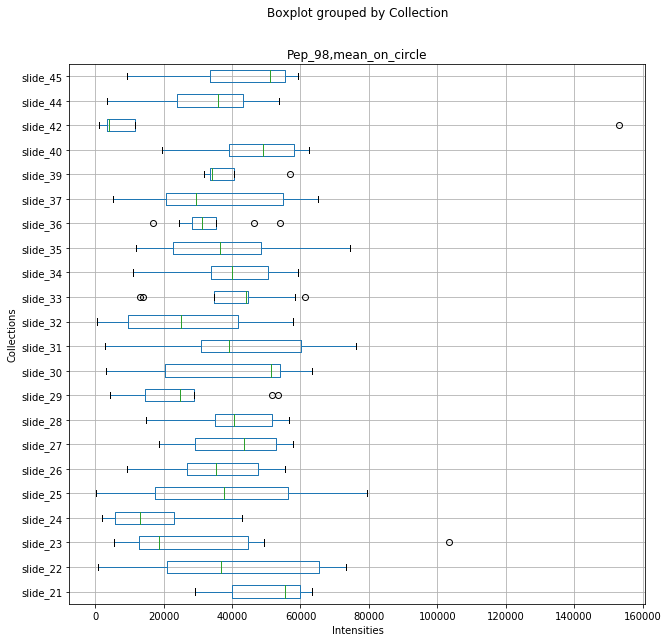

blank


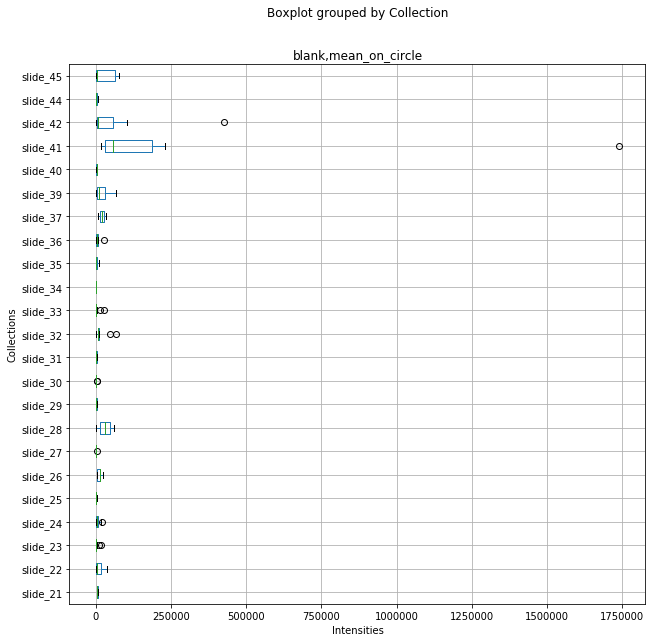

In [14]:
directory = "data/{}/pep_plots/04_circled_sub_blank_div_Nenad/".format(collections["slide_21"].study)

ensure_dir(directory)
for pep_name, pep_data in norm_spots.groupby("Name"):
    print(pep_name)
    pep_data.sort_values(by="Collection",ascending=True, inplace=True)
    pep_data.boxplot(vert=False,column="intensities2", by="Collection", figsize=(10,10))
    plt.xlabel("Intensities")
    plt.ylabel("Collections")
    plt.title("{},mean_on_circle".format(pep_name))
    #plt.savefig(directory+pep_name+".png")
    plt.show()
    plt.close()

In [16]:
frames = []
for name, data in norm_spots.groupby(["Name","Virus"]):
    x = data.mean()
    x["intensities_mean_std"] = data["intensities"].std(ddof=1)/np.sqrt(len(data))
    x["intensities_var"] = data["intensities2"].var()

    x["intensities2_mean_std"] = data["intensities2"].std(ddof=1)/np.sqrt(len(data))
    x["intensities2_var"] = data["intensities2"].var()
    
    x.name = name
    frames.append(x)
mean_spots = pd.concat(frames, axis=1)
mean_spots = mean_spots.transpose().reset_index()
mean_spots = mean_spots.rename(columns={"level_0":"Peptide Batch","level_1":"Virus"})  

In [19]:
mean_spots_grouped = mean_spots.groupby("Virus")
grouped_combinations = combinations(mean_spots_grouped,2)
frames = []
for (name1,spots1),(name2,spots2) in grouped_combinations:
    peptides = set(spots1["Peptide Batch"].unique()).intersection(set(spots2["Peptide Batch"].unique()))
    
    for peptide in peptides:
        
        spots1_this_pep = spots1.loc[spots1["Peptide Batch"] == peptide]
        spots2_this_pep = spots2.loc[spots2["Peptide Batch"] == peptide]

        v1_i = spots1_this_pep["intensities2"].iloc[0]
        v2_i = spots2_this_pep["intensities2"].iloc[0]
   
        v1_err = spots1_this_pep["intensities2_mean_std"].iloc[0]
        v2_err = spots2_this_pep["intensities2_mean_std"].iloc[0]
        
        v1_var = spots1_this_pep["intensities2_var"].iloc[0]
        v2_var = spots2_this_pep["intensities2_var"].iloc[0]
        
        where_max ,sig_max = correlated_significance(v1_i,v2_i, v1_var, v2_var)
        
        fr = pd.Series([peptide,(name1,name2),sig_max,v1_i,v2_i,v1_err,v2_err,len(spots1_this_pep),len(spots2_this_pep)],index = ["Peptide","Viruses","Significance","v1_i","v2_i","v1_err","v2_err","v1_numb","v2_numb"])
        frames.append(fr)        
        
peptide_c_signif = pd.concat(frames, axis=1).transpose()

/home/janekg89/Envs/flutype_webapp/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


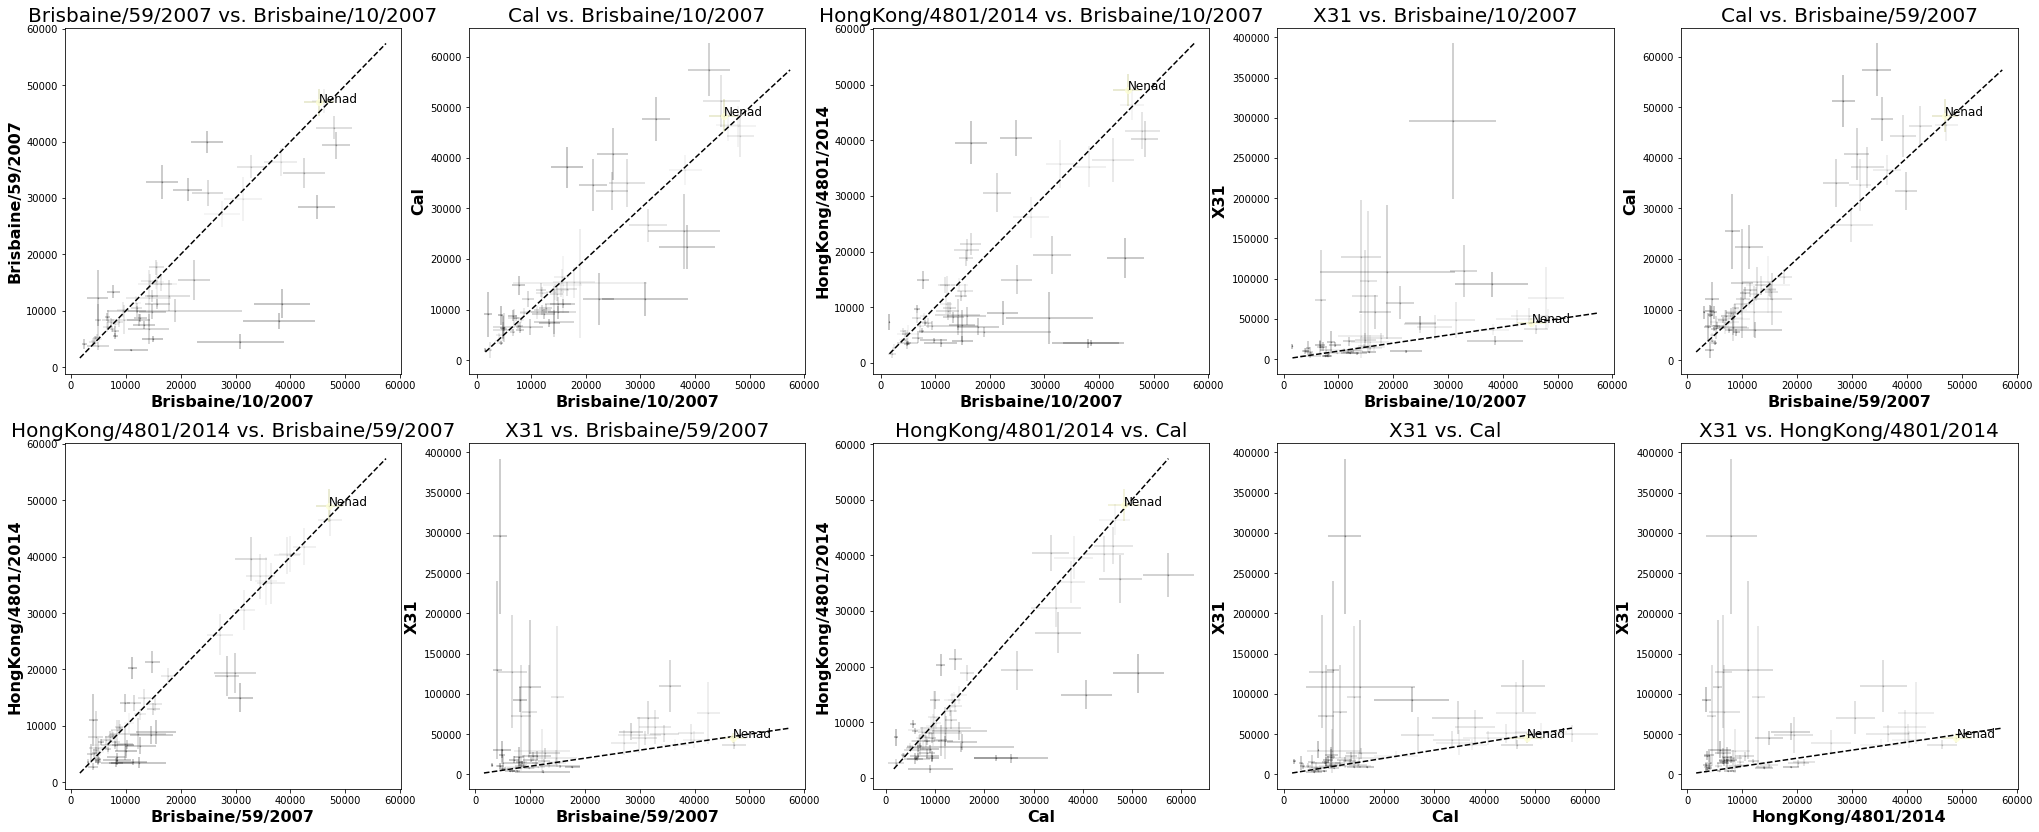

In [29]:
fig, axes = plt.subplots(ncols=5,nrows=2, figsize = (35,14))

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.YlGnBu
for name, d in peptide_c_signif.groupby("Viruses"):
    x = y = np.linspace(peptide_c_signif.v1_i.min(),peptide_c_signif.v1_i.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.35
    #d_selected = d[d["Significance"] > boundary]
    #d_n = d[d["Significance"] < boundary]
    
    
    d_n = d
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    d_selected = d.loc[d["Peptide"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Peptide"],(dp.v1_i+0.01,dp.v2_i+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.v1_i,y=dp.v2_i,xerr=dp.v1_err,yerr=dp.v2_err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    